In [1]:
# 检查生成的综合表格文件
import os
import pandas as pd

print("=== 检查生成的综合表格文件 ===")
output_dir = 'comprehensive_results'

if os.path.exists(output_dir):
    files = [f for f in os.listdir(output_dir) if f.endswith('.csv')]
    print(f"生成的文件数量: {len(files)}")
    
    for file in sorted(files):
        print(f"  - {file}")
    
    # 显示第一个文件的结构示例
    if files:
        sample_file = os.path.join(output_dir, files[0])
        print(f"\n=== {files[0]} 文件结构示例 ===")
        
        # 读取CSV文件（包含多级表头）
        df = pd.read_csv(sample_file, header=[0, 1], index_col=0)
        print(f"表格形状: {df.shape}")
        print(f"列索引级别: {df.columns.nlevels}")
        print(f"数据集: {df.columns.get_level_values(0).unique().tolist()}")
        print(f"指标: {df.columns.get_level_values(1).unique().tolist()}")
        print(f"\n前3行数据:")
        print(df.head(3).to_string())
else:
    print("综合表格目录不存在")

=== 检查生成的综合表格文件 ===
生成的文件数量: 9
  - densenet121_comprehensive_table.csv
  - densenet169_comprehensive_table.csv
  - densenet201_comprehensive_table.csv
  - resnet101_comprehensive_table.csv
  - resnet152_comprehensive_table.csv
  - resnet18_comprehensive_table.csv
  - resnet50_comprehensive_table.csv
  - seresnext_comprehensive_table.csv
  - vit-b-16_comprehensive_table.csv

=== densenet121_comprehensive_table.csv 文件结构示例 ===
表格形状: (20, 15)
列索引级别: 2
数据集: ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']
指标: ['AUROC', 'FPR95-ID', 'FPR95-OoD', 'FPR99-ID', 'FPR99-OoD']

前3行数据:
Dataset    Near-OoD                                                 Far-OoD(Bubbles&Particle)                                                 Far-OoD(General)                                                
Metric        AUROC    FPR95-ID   FPR95-OoD    FPR99-ID   FPR99-OoD                     AUROC    FPR95-ID   FPR95-OoD    FPR99-ID   FPR99-OoD            AUROC    FPR95-ID   FPR95-OoD    FPR99-ID   FPR99

## 测试阶段
### 获取pkl字典的内容，整理成一张原始的指标dataframe
以plankton54_densenet121_base_e100_lr0.1_default\s0\scores\ash.pkl为例

In [2]:
import pickle
import pandas as pd
import numpy as np
import os
from sklearn.metrics import roc_auc_score

# 读取示例pkl文件
file_path = r'plankton54_densenet121_base_e100_lr0.1_default\s1\scores\ash.pkl'
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# 查看数据结构
print("数据类型:", type(data))
print("数据键:", list(data.keys()) if isinstance(data, dict) else "不是字典类型")

# 如果是字典，查看每个键的内容
if isinstance(data, dict):
    for key, value in data.items():
        print(f"\n键 '{key}':")
        print(f"  类型: {type(value)}")
        if hasattr(value, 'shape'):
            print(f"  形状: {value.shape}")
        elif hasattr(value, '__len__'):
            print(f"  长度: {len(value)}")
        
        # 安全地显示内容示例
        if isinstance(value, dict):
            print(f"  字典键: {list(value.keys())}")
        elif isinstance(value, (list, tuple, np.ndarray)):
            print(f"  内容示例: {value[:5] if len(value) > 0 else '空'}")
        else:
            print(f"  内容: {value}")

# 进一步查看嵌套字典的内容
print("\n=== 详细分析 'id' 键的内容 ===")
if 'id' in data:
    id_data = data['id']
    for sub_key, sub_value in id_data.items():
        print(f"\nid['{sub_key}']:")
        print(f"  类型: {type(sub_value)}")
        if hasattr(sub_value, 'shape'):
            print(f"  形状: {sub_value.shape}")
            print(f"  数据类型: {sub_value.dtype if hasattr(sub_value, 'dtype') else 'N/A'}")
            print(f"  前5个值: {sub_value[:5]}")
        elif hasattr(sub_value, '__len__'):
            print(f"  长度: {len(sub_value)}")

print("\n=== 详细分析 'ood' 键的内容 ===")
if 'ood' in data:
    ood_data = data['ood']
    for sub_key, sub_value in ood_data.items():
        print(f"\nood['{sub_key}']:")
        print(f"  类型: {type(sub_value)}")
        if hasattr(sub_value, 'shape'):
            print(f"  形状: {sub_value.shape}")
            print(f"  数据类型: {sub_value.dtype if hasattr(sub_value, 'dtype') else 'N/A'}")
            print(f"  前5个值: {sub_value[:5]}")
        elif hasattr(sub_value, '__len__'):
            print(f"  长度: {len(sub_value)}")
            if isinstance(sub_value, dict):
                print(f"  字典键: {list(sub_value.keys())}")
                # 查看每个OOD数据集
                for ood_name, ood_scores in sub_value.items():
                    print(f"    {ood_name}: 类型={type(ood_scores)}, 形状={ood_scores.shape if hasattr(ood_scores, 'shape') else len(ood_scores)}")
                    if hasattr(ood_scores, 'shape') and len(ood_scores.shape) > 0:
                        print(f"      前5个值: {ood_scores[:5]}")
                    break  # 只看第一个作为示例

数据类型: <class 'dict'>
数据键: ['id', 'csid', 'ood', 'id_preds', 'id_labels', 'csid_preds', 'csid_labels']

键 'id':
  类型: <class 'dict'>
  长度: 3
  字典键: ['train', 'val', 'test']

键 'csid':
  类型: <class 'dict'>
  长度: 0
  字典键: []

键 'ood':
  类型: <class 'dict'>
  长度: 3
  字典键: ['val', 'near', 'far']

键 'id_preds':
  类型: <class 'torch.Tensor'>
  形状: torch.Size([2873])
  内容: tensor([ 0,  0,  0,  ..., 53, 53, 53])

键 'id_labels':
  类型: <class 'torch.Tensor'>
  形状: torch.Size([2873])
  内容: tensor([ 0,  0,  0,  ..., 53, 53, 53])

键 'csid_preds':
  类型: <class 'dict'>
  长度: 0
  字典键: []

键 'csid_labels':
  类型: <class 'dict'>
  长度: 0
  字典键: []

=== 详细分析 'id' 键的内容 ===

id['train']:
  类型: <class 'NoneType'>

id['val']:
  类型: <class 'NoneType'>

id['test']:
  类型: <class 'list'>
  长度: 3

=== 详细分析 'ood' 键的内容 ===

ood['val']:
  类型: <class 'NoneType'>

ood['near']:
  类型: <class 'dict'>
  长度: 1
  字典键: ['plankton_near_test']
    plankton_near_test: 类型=<class 'list'>, 形状=3

ood['far']:
  类型: <class 'dict'>
  长度: 8

In [3]:
# 查看具体的分数内容
print("=== ID测试集分数 ===")
id_scores = data['id']['test']
print(f"ID分数类型: {type(id_scores)}, 长度: {len(id_scores)}")
for i, score in enumerate(id_scores):
    print(f"  分数{i}: 类型={type(score)}, 形状={score.shape if hasattr(score, 'shape') else len(score)}")
    if hasattr(score, 'shape'):
        print(f"    前5个值: {score[:5]}")

print("\n=== OOD测试集分数 ===")
# 查看一个OOD数据集的分数
ood_dataset_name = 'plankton_far_test'
ood_scores = data['ood']['far'][ood_dataset_name]
print(f"OOD分数类型: {type(ood_scores)}, 长度: {len(ood_scores)}")
for i, score in enumerate(ood_scores):
    print(f"  分数{i}: 类型={type(score)}, 形状={score.shape if hasattr(score, 'shape') else len(score)}")
    if hasattr(score, 'shape'):
        print(f"    前5个值: {score[:5]}")

# 检查所有OOD数据集的名称
print("\n=== 所有OOD数据集 ===")
all_ood_datasets = []
for split in ['near', 'far']:
    if data['ood'][split] is not None:
        for dataset_name in data['ood'][split].keys():
            all_ood_datasets.append(dataset_name)
            print(f"{split}: {dataset_name}")

print(f"\n总共有 {len(all_ood_datasets)} 个OOD数据集")

=== ID测试集分数 ===
ID分数类型: <class 'list'>, 长度: 3
  分数0: 类型=<class 'numpy.ndarray'>, 形状=(2873,)
    前5个值: [0 0 0 0 0]
  分数1: 类型=<class 'numpy.ndarray'>, 形状=(2873,)
    前5个值: [19.238867 20.440313 21.389114 19.159409 19.073257]
  分数2: 类型=<class 'numpy.ndarray'>, 形状=(2873,)
    前5个值: [0 0 0 0 0]

=== OOD测试集分数 ===
OOD分数类型: <class 'list'>, 长度: 3
  分数0: 类型=<class 'numpy.ndarray'>, 形状=(13625,)
    前5个值: [ 0  1  0  0 51]
  分数1: 类型=<class 'numpy.ndarray'>, 形状=(13625,)
    前5个值: [12.065255  13.5233555 11.6208725  9.882793  13.677973 ]
  分数2: 类型=<class 'numpy.ndarray'>, 形状=(13625,)
    前5个值: [-1 -1 -1 -1 -1]

=== 所有OOD数据集 ===
near: plankton_near_test
far: plankton_far_test
far: cifar10
far: cifar100
far: mnist
far: svhn
far: texture
far: places365
far: tin

总共有 9 个OOD数据集


### 测试指标计算函数

In [4]:
def calculate_ood_metrics(id_scores, ood_scores):
    """
    计算OOD检测指标
    
    逻辑说明：
    1. 假设分数越高越可能是ID（域内数据）
    2. 计算两种设定下的指标：
       - ID为正类（1），OOD为负类（0）：用于计算FPR95-ID, FPR99-ID
       - OOD为正类（1），ID为负类（0）：用于计算FPR95-OoD, FPR99-OoD, AUROC
    
    返回指标：
    - AUROC: 面积下的ROC曲线
    - FPR95-ID: 在95%召回率下，ID被错分为OOD的比例（越低越好）
    - FPR95-OoD: 在95%召回率下，OOD被错分为ID的比例（越低越好）
    - FPR99-ID: 在99%召回率下，ID被错分为OOD的比例（越低越好）
    - FPR99-OoD: 在99%召回率下，OOD被错分为ID的比例（越低越好）
    """
    from sklearn.metrics import roc_auc_score, roc_curve
    
    print(f"  ID样本数: {len(id_scores)}, OOD样本数: {len(ood_scores)}")
    print(f"  ID平均分数: {np.mean(id_scores):.4f}, OOD平均分数: {np.mean(ood_scores):.4f}")
    
    # === 设定1：ID为正类（1），OOD为负类（0） ===
    # 用于计算FPR95-ID, FPR99-ID (ID被错分为OOD的比例)
    y_true_1 = np.concatenate([
        np.ones(len(id_scores)),   # ID样本标签为1（正类）
        np.zeros(len(ood_scores))  # OOD样本标签为0（负类）
    ])
    y_score_1 = np.concatenate([id_scores, ood_scores])
    
    # 计算ROC曲线
    fpr_1, tpr_1, _ = roc_curve(y_true_1, y_score_1)
    
    # 找到TPR>=0.95和TPR>=0.99时的FPR (这里的FPR就是ID被错分为OOD的比例)
    tpr95_idx_1 = np.where(tpr_1 >= 0.95)[0]
    fpr95_id = fpr_1[tpr95_idx_1[0]] if len(tpr95_idx_1) > 0 else 1.0
    
    tpr99_idx_1 = np.where(tpr_1 >= 0.99)[0]
    fpr99_id = fpr_1[tpr99_idx_1[0]] if len(tpr99_idx_1) > 0 else 1.0
    
    # === 设定2：OOD为正类（1），ID为负类（0） ===
    # 用于计算AUROC和FPR95-OoD, FPR99-OoD (OOD被错分为ID的比例)
    y_true_2 = np.concatenate([
        np.zeros(len(id_scores)),  # ID样本标签为0（负类）
        np.ones(len(ood_scores))   # OOD样本标签为1（正类）
    ])
    # 反转分数，使得OOD分数越高表示越可能是OOD
    y_score_2 = np.concatenate([-id_scores, -ood_scores])
    
    # 计算AUROC（标准OOD检测指标）
    auroc = roc_auc_score(y_true_2, y_score_2)
    
    # 计算ROC曲线
    fpr_2, tpr_2, _ = roc_curve(y_true_2, y_score_2)
    
    # 找到TPR>=0.95和TPR>=0.99时的FPR (这里的FPR就是OOD被错分为ID的比例)
    tpr95_idx_2 = np.where(tpr_2 >= 0.95)[0]
    fpr95_ood = fpr_2[tpr95_idx_2[0]] if len(tpr95_idx_2) > 0 else 1.0
    
    tpr99_idx_2 = np.where(tpr_2 >= 0.99)[0]
    fpr99_ood = fpr_2[tpr99_idx_2[0]] if len(tpr99_idx_2) > 0 else 1.0
    
    print(f"  AUROC: {auroc:.4f}")
    print(f"  FPR95-ID: {fpr95_id:.4f}, FPR95-OoD: {fpr95_ood:.4f}")
    print(f"  FPR99-ID: {fpr99_id:.4f}, FPR99-OoD: {fpr99_ood:.4f}")
    
    return {
        'AUROC': auroc,
        'FPR95-ID': fpr95_id,
        'FPR95-OoD': fpr95_ood,
        'FPR99-ID': fpr99_id,
        'FPR99-OoD': fpr99_ood
    }

def process_method(pkl_file_path):
    """
    处理单个方法的pkl文件，计算所有OOD数据集的指标
    
    Args:
        pkl_file_path: pkl文件路径
    
    Returns:
        pandas.DataFrame: 包含所有OOD数据集指标的数据框
    """
    # 读取数据
    with open(pkl_file_path, 'rb') as f:
        data = pickle.load(f)
    
    # 获取ID测试集分数（使用index=1的连续分数）
    id_scores = data['id']['test'][1]
    
    # 收集所有OOD数据集的结果
    results = []
    
    # 用于存储Far-OoD(General)数据集的指标（用于后续计算均值）
    far_general_datasets = ['cifar10', 'cifar100', 'mnist', 'svhn', 'texture', 'places365', 'tin']
    far_general_metrics = []
    
    # 处理所有OOD数据集
    for split in ['near', 'far']:
        if data['ood'][split] is not None:
            for ood_name, ood_data in data['ood'][split].items():
                print(f"\n处理OOD数据集: {ood_name}")
                
                # 获取OOD分数（使用index=1的连续分数）
                ood_scores = ood_data[1]
                
                # 计算指标
                metrics = calculate_ood_metrics(id_scores, ood_scores)
                
                # 重命名数据集
                if ood_name == 'plankton_near_test':
                    dataset_display_name = 'Near-OoD'
                elif ood_name == 'plankton_far_test':
                    dataset_display_name = 'Far-OoD(Bubbles&Particle)'
                else:
                    dataset_display_name = ood_name
                
                # 添加数据集名称
                metrics['Dataset'] = dataset_display_name
                results.append(metrics)
                
                # 如果是Far-OoD(General)中的数据集，收集其指标（用于后续计算均值）
                if ood_name in far_general_datasets:
                    far_general_metrics.append(metrics.copy())  # 复制指标字典
    
    # 处理Far-OoD(General): 计算7个数据集指标的均值
    if far_general_metrics:
        print(f"\n处理Far-OoD(General): 计算 {len(far_general_datasets)} 个数据集指标的均值")
        
        # 计算每个指标的均值
        avg_metrics = {}
        metric_keys = ['FPR95-ID', 'FPR95-OoD', 'FPR99-ID', 'FPR99-OoD', 'AUROC']
        
        for metric_key in metric_keys:
            # 收集所有Far-OoD(General)数据集的该指标值
            metric_values = [m[metric_key] for m in far_general_metrics if metric_key in m]
            if metric_values:
                avg_metrics[metric_key] = np.mean(metric_values)
                print(f"  {metric_key}: {len(metric_values)}个值的均值 = {avg_metrics[metric_key]:.4f}")
        
        # 添加数据集名称
        avg_metrics['Dataset'] = 'Far-OoD(General)'
        results.append(avg_metrics)
    
    # 创建数据框
    df = pd.DataFrame(results)
    
    # 重新排列列的顺序
    columns_order = ['Dataset', 'FPR95-ID', 'FPR95-OoD', 'FPR99-ID', 'FPR99-OoD', 'AUROC']
    df = df[columns_order]
    
    return df

# 测试单个方法
print("=== 测试ASH方法 ===")
ash_file = r'plankton54_densenet121_base_e100_lr0.1_default\s1\scores\ash.pkl'
ash_results = process_method(ash_file)
print(f"\n=== ASH方法结果 ===")
print(ash_results.round(4))

=== 测试ASH方法 ===

处理OOD数据集: plankton_near_test
  ID样本数: 2873, OOD样本数: 1144
  ID平均分数: 19.9319, OOD平均分数: 13.5263
  AUROC: 0.9103
  FPR95-ID: 0.4257, FPR95-OoD: 0.3884
  FPR99-ID: 0.6285, FPR99-OoD: 0.6241

处理OOD数据集: plankton_far_test
  ID样本数: 2873, OOD样本数: 13625
  ID平均分数: 19.9319, OOD平均分数: 13.6081
  AUROC: 0.8958
  FPR95-ID: 0.4183, FPR95-OoD: 0.5144
  FPR99-ID: 0.6272, FPR99-OoD: 0.7866

处理OOD数据集: cifar10
  ID样本数: 2873, OOD样本数: 9000
  ID平均分数: 19.9319, OOD平均分数: 18.3702
  AUROC: 0.6431
  FPR95-ID: 0.7324, FPR95-OoD: 1.0000
  FPR99-ID: 0.9118, FPR99-OoD: 1.0000

处理OOD数据集: cifar100
  ID样本数: 2873, OOD样本数: 9000
  ID平均分数: 19.9319, OOD平均分数: 18.9732
  AUROC: 0.6188
  FPR95-ID: 0.7506, FPR95-OoD: 1.0000
  FPR99-ID: 0.9210, FPR99-OoD: 1.0000

处理OOD数据集: mnist
  ID样本数: 2873, OOD样本数: 70000
  ID平均分数: 19.9319, OOD平均分数: 13.6738
  AUROC: 0.9486
  FPR95-ID: 0.4755, FPR95-OoD: 0.1190
  FPR99-ID: 0.8398, FPR99-OoD: 0.1504

处理OOD数据集: svhn
  ID样本数: 2873, OOD样本数: 26032
  ID平均分数: 19.9319, OOD平均分数: 17.9538
  AURO

In [5]:
def create_comparison_table(base_path, methods=['ash', 'msp', 'dice', 'react'], seed='s0'):
    """
    为单个seed创建多种方法的OOD检测指标比较表
    
    Args:
        base_path: 基础路径（如 'plankton54_densenet121_base_e100_lr0.1_default'）
        methods: 要比较的方法列表
        seed: 种子文件夹（如 's0', 's1', 's2'）
    
    Returns:
        dict: 包含不同指标比较表的字典
    """
    scores_path = os.path.join(base_path, seed, 'scores')
    print(f"处理路径: {scores_path}")
    
    # 存储每个方法的结果
    method_results = {}
    
    for method in methods:
        pkl_file = os.path.join(scores_path, f'{method}.pkl')
        if os.path.exists(pkl_file):
            print(f"  处理方法: {method.upper()}")
            try:
                df_method = process_method(pkl_file)
                method_results[method] = df_method
                print(f"  ✅ {method} 完成，{len(df_method)}个数据集")
            except Exception as e:
                print(f"  ❌ {method} 错误: {str(e)}")
        else:
            print(f"  ❌ 文件不存在: {pkl_file}")
    
    if not method_results:
        print("没有成功处理任何方法！")
        return None
    
    # 获取数据集名称
    first_method = list(method_results.keys())[0]
    dataset_names = method_results[first_method]['Dataset'].tolist()
    
    # 为每个指标创建比较表
    metrics = ['FPR95-ID', 'FPR95-OoD', 'FPR99-ID', 'FPR99-OoD', 'AUROC']
    comparison_tables = {}
    
    for metric in metrics:
        table_data = []
        
        for dataset in dataset_names:
            row = {'Dataset': dataset}
            for method in method_results.keys():
                df = method_results[method]
                dataset_row = df[df['Dataset'] == dataset]
                if not dataset_row.empty:
                    row[method.upper()] = dataset_row[metric].iloc[0]
                else:
                    row[method.upper()] = np.nan
            table_data.append(row)
        
        comparison_tables[metric] = pd.DataFrame(table_data)
    
    return comparison_tables

### 测试创建五个指标的独立DataFrame函数
基于修正后的跨种子统计分析，为每个指标创建独立的DataFrame表格

In [6]:
def create_individual_metric_dataframes(statistics_dict, methods=['ASH', 'MSP', 'DICE', 'REACT', 'EBO', 'DROPOUT', 'FDBD', 'GEN', 'GRADNORM', 'KLM', 'KNN', 'MDS', 'MLS', 'OPENMAX', 'RELATION', 'RESIDUAL', 'RMDS', 'SHE', 'TEMP_SCALING', 'VIM']):
    """
    基于跨种子统计结果，为每个指标创建独立的DataFrame
    
    Args:
        statistics_dict: calculate_cross_seed_statistics_corrected的返回结果
        methods: 要包含的方法列表
    
    Returns:
        dict: 包含每个指标DataFrame的字典
    """
    if not statistics_dict:
        return None
    
    # 五个指标名称
    metrics = ['AUROC', 'FPR95-ID', 'FPR95-OoD', 'FPR99-ID', 'FPR99-OoD']
    
    # 指标说明
    metric_descriptions = {
        'AUROC': 'ROC曲线下面积（越高越好）',
        'FPR95-ID': 'ID被错分为OOD的比例@95%召回率（越低越好）',
        'FPR95-OoD': 'OOD被错分为ID的比例@95%召回率（越低越好）',
        'FPR99-ID': 'ID被错分为OOD的比例@99%召回率（越低越好）',
        'FPR99-OoD': 'OOD被错分为ID的比例@99%召回率（越低越好）'
    }
    
    # 存储每个指标的DataFrame
    metric_dataframes = {}
    
    for metric in metrics:
        if metric not in statistics_dict:
            continue
        
        # 获取该指标的汇总表
        summary_df = statistics_dict[metric]['summary'].copy()
        
        if summary_df.empty:
            continue
        
        # 检查是否包含所有需要的方法列
        available_methods = [method for method in methods if method in summary_df.columns]
        
        if not available_methods:
            continue
        
        # 创建该指标的DataFrame（只包含Dataset列和可用的方法列）
        columns_to_keep = ['Dataset'] + available_methods
        metric_df = summary_df[columns_to_keep].copy()
        
        # 进行转置操作：将数据集设为索引，方法作为列，然后转置
        metric_df_transposed = metric_df.set_index('Dataset').T
        # 重置索引，将方法名作为第一列
        metric_df_transposed = metric_df_transposed.reset_index()
        metric_df_transposed.rename(columns={'index': 'Method'}, inplace=True)
        
        # 添加指标信息作为元数据
        metric_df_transposed.attrs['metric_name'] = metric
        metric_df_transposed.attrs['description'] = metric_descriptions.get(metric, '')
        metric_df_transposed.attrs['available_methods'] = available_methods
        
        metric_dataframes[metric] = metric_df_transposed
    
    return metric_dataframes

# # 创建DenseNet-121的五个指标DataFrame并直接显示
# if 'densenet121_stats_corrected' in globals() and densenet121_stats_corrected:
#     individual_metrics = create_individual_metric_dataframes(
#         densenet121_stats_corrected, 
#         #methods=['ASH', 'MSP', 'DICE', 'REACT', 'EBO', 'DROPOUT', 'FDBD', 'GEN', 'GRADNORM', 'KLM', 'KNN', 'MDS', 'MLS', 'OPENMAX', 'RELATION', 'RESIDUAL', 'RMDS', 'SHE', 'TEMP_SCALING', 'VIM']
#     )
    
#     if individual_metrics:
#         print("DenseNet-121 OOD检测指标结果")
#         print("=" * 60)
        
#         # 显示每个指标的DataFrame
#         for metric_name, df in individual_metrics.items():
#             print(f"\n{metric_name}")
#             print("-" * 50)
#             print(df.to_string(index=False))
            
#             # 保存文件（静默）
#             filename = f"densenet121_{metric_name.replace('-', '_').lower()}_table.csv"
#             df.to_csv(filename, index=False)
        
#         print(f"\n已保存5个CSV文件 | 格式: 均值±标准差 (3个种子)")
#     else:
#         print("DataFrame创建失败")
# else:
#     print("请先运行跨种子统计分析")

### 检查不同指标的方法

In [7]:
def detect_available_methods(base_path, seed='s0'):
    """
    动态检测指定网络架构中可用的OOD检测方法
    
    Args:
        base_path: 网络模型的基础路径
        seed: 检查的种子文件夹，默认's0'
    
    Returns:
        tuple: (所有可用方法的小写列表, 所有可用方法的大写列表)
    """
    scores_path = os.path.join(base_path, seed, 'scores')
    
    if not os.path.exists(scores_path):
        print(f"路径不存在: {scores_path}")
        return [], []
    
    # 获取所有pkl文件
    pkl_files = [f for f in os.listdir(scores_path) if f.endswith('.pkl')]
    
    # 提取方法名（去掉.pkl后缀）
    available_methods_lower = [f[:-4] for f in pkl_files]
    available_methods_upper = [method.upper() for method in available_methods_lower]
    
    # 按字母顺序排序
    available_methods_lower.sort()
    available_methods_upper.sort()
    
    print(f"检测到的网络: {base_path}")
    print(f"可用方法数量: {len(available_methods_lower)}")
    print(f"方法列表: {available_methods_lower}")
    
    return available_methods_lower, available_methods_upper

def calculate_cross_seed_statistics_adaptive(base_path):
    """
    自适应地计算跨种子统计数据，根据网络架构动态检测可用方法
    
    Args:
        base_path: 网络模型的基础路径
    
    Returns:
        dict: 跨种子统计结果
    """
    # 动态检测可用方法
    methods_lower, methods_upper = detect_available_methods(base_path)
    
    if not methods_lower:
        print("未检测到任何可用方法")
        return None
    
    print(f"\n使用自适应方法计算: {len(methods_lower)} 种OOD检测方法")
    
    # 检查是否有calculate_cross_seed_statistics_corrected函数
    if 'calculate_cross_seed_statistics_corrected' not in globals():
        print("缺少calculate_cross_seed_statistics_corrected函数，请先运行之前的单元格")
        return None
    
    # 调用跨种子统计计算函数
    stats_result = calculate_cross_seed_statistics_corrected(
        base_path=base_path, 
        methods=methods_lower
    )
    
    return stats_result, methods_upper

# 测试自适应方法检测
print("=== 测试不同网络架构的方法检测 ===")

# 测试DenseNet-121
densenet_methods_lower, densenet_methods_upper = detect_available_methods(
    'plankton54_densenet121_base_e100_lr0.1_default'
)

print(f"\nDenseNet-121方法: {len(densenet_methods_lower)} 种")

# 测试ResNet-50
resnet_methods_lower, resnet_methods_upper = detect_available_methods(
    'plankton54_resnet50_base_e100_lr0.1_default'
)

print(f"\nResNet-50方法: {len(resnet_methods_lower)} 种")

# 测试SEResNeXt
seresnext_methods_lower, seresnext_methods_upper = detect_available_methods(
    'plankton54_seresnext_base_e100_lr0.1_default'
)

print(f"\nSEResNeXt方法: {len(seresnext_methods_lower)} 种")

# 显示方法差异
densenet_set = set(densenet_methods_lower)
resnet_set = set(resnet_methods_lower)

print(f"\n=== 方法差异分析 ===")
print(f"ResNet系列独有的方法: {sorted(resnet_set - densenet_set)}")
print(f"DenseNet系列独有的方法: {sorted(densenet_set - resnet_set)}")
print(f"共同方法: {sorted(densenet_set & resnet_set)}")

=== 测试不同网络架构的方法检测 ===
检测到的网络: plankton54_densenet121_base_e100_lr0.1_default
可用方法数量: 20
方法列表: ['ash', 'dice', 'dropout', 'ebo', 'fdbd', 'gen', 'gradnorm', 'klm', 'knn', 'mds', 'mls', 'msp', 'openmax', 'react', 'relation', 'residual', 'rmds', 'she', 'temp_scaling', 'vim']

DenseNet-121方法: 20 种
检测到的网络: plankton54_resnet50_base_e100_lr0.1_default
可用方法数量: 24
方法列表: ['ash', 'dice', 'dropout', 'ebo', 'fdbd', 'gen', 'gradnorm', 'gram', 'klm', 'knn', 'mds', 'mds_ensemble', 'mls', 'msp', 'odin', 'openmax', 'rankfeat', 'react', 'relation', 'residual', 'rmds', 'she', 'temp_scaling', 'vim']

ResNet-50方法: 24 种
检测到的网络: plankton54_seresnext_base_e100_lr0.1_default
可用方法数量: 23
方法列表: ['ash', 'dice', 'dropout', 'ebo', 'fdbd', 'gen', 'gradnorm', 'klm', 'knn', 'mds', 'mds_ensemble', 'mls', 'msp', 'odin', 'openmax', 'rankfeat', 'react', 'relation', 'residual', 'rmds', 'she', 'temp_scaling', 'vim']

SEResNeXt方法: 23 种

=== 方法差异分析 ===
ResNet系列独有的方法: ['gram', 'mds_ensemble', 'odin', 'rankfeat']
DenseNet系列独有的方法: 

### 测试单个网络的五个指标计算

In [8]:
def process_network_adaptive(base_path, network_name=None):
    """
    自适应地处理任何网络架构的OOD检测分析
    
    Args:
        base_path: 网络模型的基础路径
        network_name: 网络名称（用于显示，如果不提供则从路径提取）
    
    Returns:
        dict: 包含DataFrame的字典，如果失败则返回None
    """
    # 简化网络名称提取
    if network_name is None:
        network_name = base_path.split('_')[1] if '_' in base_path else base_path
        # 特殊处理：将vit-b-16显示为vit
        if network_name == 'vit-b-16':
            network_name = 'vit'
    
    print(f"处理网络: {network_name}")
    
    # 动态检测可用方法
    methods_lower, methods_upper = detect_available_methods(base_path)
    
    if not methods_lower:
        print(f"  {network_name}: 未检测到任何可用方法")
        return None
    
    print(f"  {network_name}: 检测到 {len(methods_lower)} 种OOD检测方法")
    
    # 检查必要函数是否存在
    if 'calculate_cross_seed_statistics_corrected' not in globals():
        print("  缺少calculate_cross_seed_statistics_corrected函数，请先运行之前的单元格")
        return None
    
    # 计算跨种子统计数据
    print(f"  正在计算 {network_name} 的跨种子统计...")
    stats_result = calculate_cross_seed_statistics_corrected(
        base_path=base_path, 
        methods=methods_lower
    )
    
    if not stats_result:
        print(f"  {network_name}: 跨种子统计计算失败")
        return None
    
    print(f"  {network_name}: 统计数据计算完成")
    
    # 创建DataFrame
    print(f"  正在创建 {network_name} 的指标DataFrame...")
    individual_metrics = create_individual_metric_dataframes(
        stats_result, 
        methods=methods_upper
    )
    
    if not individual_metrics:
        print(f"  {network_name}: DataFrame创建失败")
        return None
    
    print(f"  {network_name}: DataFrame创建完成")
    
    # 创建输出文件夹
    output_dir = 'ood_results'
    safe_network_name = base_path.split('_')[1] if '_' in base_path else 'unknown'
    # 特殊处理：将vit-b-16显示为vit
    if safe_network_name == 'vit-b-16':
        safe_network_name = 'vit'
    network_output_dir = os.path.join(output_dir, safe_network_name)
    os.makedirs(network_output_dir, exist_ok=True)
    
    # 显示结果和保存文件
    print(f"\n{network_name} OOD检测指标结果")
    print("=" * 80)
    
    for metric_name, df in individual_metrics.items():
        print(f"\n{metric_name}")
        print("-" * 60)
        print(df.to_string(index=False))
        
        # 保存文件到指定文件夹
        filename = f"{metric_name.replace('-', '_').lower()}_table.csv"
        filepath = os.path.join(network_output_dir, filename)
        df.to_csv(filepath, index=False)
    
    print(f"\n  已保存 {len(individual_metrics)} 个CSV文件到 {network_output_dir}")
    
    return {
        'network_name': network_name,
        'methods_count': len(methods_lower),
        'available_methods': methods_lower,
        'dataframes': individual_metrics,
        'stats': stats_result,
        'output_dir': network_output_dir
    }

def batch_process_all_networks():
    """
    批量处理工作空间中的所有网络架构
    """
    # 获取所有网络文件夹
    network_folders = [d for d in os.listdir('.') if d.startswith('plankton54_') and os.path.isdir(d)]
    
    print(f"发现 {len(network_folders)} 个网络架构:")
    for folder in network_folders:
        print(f"  - {folder}")
    
    results = {}
    success_count = 0
    
    # 创建主输出目录
    output_dir = 'ood_results'
    os.makedirs(output_dir, exist_ok=True)
    print(f"输出目录: {output_dir}")
    print("-" * 50)
    
    for folder in network_folders:
        try:
            result = process_network_adaptive(folder)
            if result:
                results[folder] = result
                success_count += 1
                print(f"  {folder}: 处理成功")
            else:
                print(f"  {folder}: 处理失败")
        except Exception as e:
            print(f"  {folder}: 发生错误 - {str(e)}")
        
        print("-" * 50)
    
    print(f"\n批量处理完成")
    print(f"总网络数: {len(network_folders)}")
    print(f"成功处理: {success_count}")
    print(f"失败: {len(network_folders) - success_count}")
    print(f"结果保存在: {output_dir} 文件夹中")
    
    return results

## 所有网络的五个指标计算

In [9]:
def calculate_cross_seed_statistics_corrected(base_path, methods=['ash', 'msp', 'dice', 'react']):
    """
    计算跨种子的统计数据（均值和标准差），并格式化为百分比字符串
    
    Args:
        base_path: 基础路径（如 'plankton54_densenet121_base_e100_lr0.1_default'）
        methods: 要处理的方法列表
    
    Returns:
        dict: 包含每个指标统计结果的字典
    """
    print(f"处理路径: {base_path}")
    print(f"方法数量: {len(methods)}")
    
    seeds = ['s0', 's1', 's2']
    metrics = ['FPR95-ID', 'FPR95-OoD', 'FPR99-ID', 'FPR99-OoD', 'AUROC']
    
    # 存储所有种子的结果
    all_seed_results = {}
    
    # 处理每个种子
    for seed in seeds:
        print(f"  处理种子: {seed}")
        seed_results = create_comparison_table(base_path, methods, seed)
        
        if seed_results:
            all_seed_results[seed] = seed_results
            print(f"    {seed} 完成，{len(seed_results)} 个指标")
        else:
            print(f"    {seed} 失败")
    
    if not all_seed_results:
        print("没有任何种子处理成功")
        return None
    
    print(f"成功处理 {len(all_seed_results)} 个种子")
    
    # 计算跨种子统计
    statistics_results = {}
    
    for metric in metrics:
        print(f"  计算指标: {metric}")
        
        # 收集该指标的所有种子数据
        seed_dataframes = []
        for seed in seeds:
            if seed in all_seed_results and metric in all_seed_results[seed]:
                seed_dataframes.append(all_seed_results[seed][metric])
        
        if not seed_dataframes:
            print(f"    {metric}: 没有可用数据")
            continue
        
        # 获取数据集名称（从第一个种子）
        dataset_names = seed_dataframes[0]['Dataset'].tolist()
        
        # 获取方法名称（除了Dataset列）
        method_columns = [col for col in seed_dataframes[0].columns if col != 'Dataset']
        
        # 创建汇总表格
        summary_data = []
        
        for dataset in dataset_names:
            row = {'Dataset': dataset}
            
            for method in method_columns:
                # 收集该数据集+方法的所有种子值
                values = []
                for df in seed_dataframes:
                    dataset_row = df[df['Dataset'] == dataset]
                    if not dataset_row.empty:
                        value = dataset_row[method].iloc[0]
                        if not np.isnan(value):
                            values.append(value)
                
                if values:
                    # 计算均值和标准差（使用ddof=0匹配CSV格式）
                    mean_val = np.mean(values)
                    std_val = np.std(values, ddof=0)
                    
                    # 转换为百分比并格式化为字符串
                    mean_pct = mean_val * 100
                    std_pct = std_val * 100
                    
                    # 格式化为 "均值±标准差" 的字符串
                    row[method] = f"{mean_pct:.2f}±{std_pct:.2f}"
                else:
                    row[method] = "N/A"
            
            summary_data.append(row)
        
        summary_df = pd.DataFrame(summary_data)
        
        # 存储结果
        statistics_results[metric] = {
            'summary': summary_df,
            'raw_data': {seed: all_seed_results[seed][metric] for seed in seeds if seed in all_seed_results and metric in all_seed_results[seed]},
            'dataset_count': len(dataset_names),
            'method_count': len(method_columns)
        }
        
        print(f"    {metric}: {len(dataset_names)} 数据集, {len(method_columns)} 方法")
    
    print(f"统计计算完成: {len(statistics_results)} 个指标")
    return statistics_results

def process_network_clean(base_path, network_name=None, output_dir='ood_results'):
    """
    处理网络架构的OOD检测分析（无表情符号版本）
    
    Args:
        base_path: 网络模型的基础路径
        network_name: 网络名称（用于显示，如果不提供则从路径提取）
        output_dir: 输出目录
    
    Returns:
        dict: 包含DataFrame的字典，如果失败则返回None
    """
    # 简化网络名称提取
    if network_name is None:
        network_name = base_path.split('_')[1] if '_' in base_path else base_path
    
    print(f"处理网络: {network_name}")
    
    # 动态检测可用方法
    methods_lower, methods_upper = detect_available_methods(base_path)
    
    if not methods_lower:
        print(f"  {network_name}: 未检测到任何可用方法")
        return None
    
    print(f"  {network_name}: 检测到 {len(methods_lower)} 种OOD检测方法")
    
    # 计算跨种子统计数据
    print(f"  正在计算 {network_name} 的跨种子统计...")
    stats_result = calculate_cross_seed_statistics_corrected(
        base_path=base_path, 
        methods=methods_lower
    )
    
    if not stats_result:
        print(f"  {network_name}: 跨种子统计计算失败")
        return None
    
    print(f"  {network_name}: 统计数据计算完成")
    
    # 创建DataFrame
    print(f"  正在创建 {network_name} 的指标DataFrame...")
    individual_metrics = create_individual_metric_dataframes(
        stats_result, 
        methods=methods_upper
    )
    
    if not individual_metrics:
        print(f"  {network_name}: DataFrame创建失败")
        return None
    
    print(f"  {network_name}: DataFrame创建完成")
    
    # 创建输出文件夹
    safe_network_name = base_path.split('_')[1] if '_' in base_path else 'unknown'
    network_output_dir = os.path.join(output_dir, safe_network_name)
    os.makedirs(network_output_dir, exist_ok=True)
    
    print(f"  保存 {network_name} 结果到: {network_output_dir}")
    
    # 保存结果和显示
    for metric_name, df in individual_metrics.items():
        print(f"\n{network_name} - {metric_name}")
        print("-" * 60)
        print(df.to_string(index=False))
        
        # 保存文件到子文件夹
        filename = f"{metric_name.replace('-', '_').lower()}_table.csv"
        filepath = os.path.join(network_output_dir, filename)
        df.to_csv(filepath, index=False)
    
    print(f"\n  已保存 {len(individual_metrics)} 个CSV文件到 {network_output_dir}")
    
    return {
        'network_name': network_name,
        'methods_count': len(methods_lower),
        'available_methods': methods_lower,
        'dataframes': individual_metrics,
        'stats': stats_result,
        'output_dir': network_output_dir
    }

def batch_process_all_networks_clean(output_dir='ood_results'):
    """
    批量处理工作空间中的所有网络架构
    """
    # 创建主输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    # 获取所有网络文件夹
    network_folders = [d for d in os.listdir('.') if d.startswith('plankton54_') and os.path.isdir(d)]
    
    print(f"发现 {len(network_folders)} 个网络架构:")
    for folder in network_folders:
        print(f"  - {folder}")
    
    print(f"\n输出目录: {output_dir}")
    print("=" * 80)
    
    results = {}
    success_count = 0
    
    for folder in network_folders:
        try:
            result = process_network_clean(folder, output_dir=output_dir)
            if result:
                results[folder] = result
                success_count += 1
                print(f"  {folder}: 处理成功")
            else:
                print(f"  {folder}: 处理失败")
        except Exception as e:
            print(f"  {folder}: 发生错误 - {str(e)}")
        
        print("-" * 50)
    
    print(f"\n批量处理完成")
    print(f"总网络数: {len(network_folders)}")
    print(f"成功处理: {success_count}")
    print(f"失败: {len(network_folders) - success_count}")
    print(f"结果保存在: {output_dir}")
    
    return results

# 执行批量处理
print("开始批量处理所有网络架构...")
batch_results = batch_process_all_networks_clean()

开始批量处理所有网络架构...
发现 9 个网络架构:
  - plankton54_densenet121_base_e100_lr0.1_default
  - plankton54_densenet169_base_e100_lr0.1_default
  - plankton54_densenet201_base_e100_lr0.1_default
  - plankton54_resnet101_base_e100_lr0.1_default
  - plankton54_resnet152_base_e100_lr0.1_default
  - plankton54_resnet18_224x224_base_e100_lr0.1_default
  - plankton54_resnet50_base_e100_lr0.1_default
  - plankton54_seresnext_base_e100_lr0.1_default
  - plankton54_vit-b-16_base_e100_lr0.1_default

输出目录: ood_results
处理网络: densenet121
检测到的网络: plankton54_densenet121_base_e100_lr0.1_default
可用方法数量: 20
方法列表: ['ash', 'dice', 'dropout', 'ebo', 'fdbd', 'gen', 'gradnorm', 'klm', 'knn', 'mds', 'mls', 'msp', 'openmax', 'react', 'relation', 'residual', 'rmds', 'she', 'temp_scaling', 'vim']
  densenet121: 检测到 20 种OOD检测方法
  正在计算 densenet121 的跨种子统计...
处理路径: plankton54_densenet121_base_e100_lr0.1_default
方法数量: 20
  处理种子: s0
处理路径: plankton54_densenet121_base_e100_lr0.1_default\s0\scores
  处理方法: ASH

处理OOD数据集: plankton_near_

## 为每个网络架构生成一张综合表格

In [10]:
def create_comprehensive_table_for_network_from_csv(network_name, csv_source_dir='ood_results', output_dir='comprehensive_results'):
    """
    从已保存的CSV文件创建综合表格，包含多级表头
    
    表格结构：
    - 列：多级表头 - 数据集名称 x 五个指标
    - 行：方法名称
    
    Args:
        network_name: 网络名称（如 'densenet121', 'resnet50' 等）
        csv_source_dir: CSV文件的源目录
        output_dir: 输出目录
    
    Returns:
        pandas.DataFrame: 综合表格
    """
    print(f"为 {network_name} 从CSV文件创建综合表格...")
    
    # 构建网络对应的CSV文件目录
    network_csv_dir = os.path.join(csv_source_dir, network_name)
    
    if not os.path.exists(network_csv_dir):
        print(f"  {network_name}: CSV目录不存在 - {network_csv_dir}")
        return None
    
    # 读取每个指标的CSV文件
    metrics = ['auroc', 'fpr95_id', 'fpr95_ood', 'fpr99_id', 'fpr99_ood']
    metric_dataframes = {}
    
    for metric in metrics:
        csv_file = os.path.join(network_csv_dir, f"{metric}_table.csv")
        if os.path.exists(csv_file):
            try:
                # 读取CSV文件，第一列是Method，其余列是数据集
                df = pd.read_csv(csv_file, index_col=0)
                metric_dataframes[metric] = df
                print(f"  读取 {metric} 文件成功，形状: {df.shape}")
            except Exception as e:
                print(f"  读取 {metric} 文件失败: {str(e)}")
        else:
            print(f"  {metric} 文件不存在: {csv_file}")
    
    if not metric_dataframes:
        print(f"  {network_name}: 没有找到任何有效的CSV文件")
        return None
    
    
    # 数据集列表（按指定顺序，只包含目标的3个数据集）
    target_datasets = ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']
    metric_names = ['AUROC', 'FPR95-ID', 'FPR95-OoD', 'FPR99-ID', 'FPR99-OoD']
    
    # 获取所有方法名称（从第一个有效的DataFrame获取）
    first_df = list(metric_dataframes.values())[0]
    all_methods = first_df.index.tolist()
    
    # 创建多级列索引
    multi_columns = []
    for dataset in target_datasets:
        for metric_name in metric_names:
            multi_columns.append((dataset, metric_name))
    
    # 创建MultiIndex
    column_index = pd.MultiIndex.from_tuples(multi_columns, names=['Dataset', 'Metric'])
    
    # 准备综合数据
    comprehensive_data = []
    
    for method in all_methods:
        row_data = {}
        
        # 对每个数据集和指标组合收集数据
        for dataset in target_datasets:
            for i, metric_name in enumerate(metric_names):
                metric_key = metrics[i]  # 对应的文件名前缀
                
                if metric_key in metric_dataframes:
                    df = metric_dataframes[metric_key]
                    
                    # 检查数据集列是否存在
                    if dataset in df.columns and method in df.index:
                        value = df.loc[method, dataset]
                        row_data[(dataset, metric_name)] = value
                    else:
                        row_data[(dataset, metric_name)] = 'N/A'
                else:
                    row_data[(dataset, metric_name)] = 'N/A'
        
        comprehensive_data.append(row_data)
    
    # 创建DataFrame
    comprehensive_df = pd.DataFrame(comprehensive_data, 
                                   columns=column_index, 
                                   index=all_methods)
    
    # 设置索引名称
    comprehensive_df.index.name = 'Method'
    
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    # 保存文件
    filename = f"{network_name}_comprehensive_table.csv"
    filepath = os.path.join(output_dir, filename)
    comprehensive_df.to_csv(filepath)
    
    # 显示结果
    print(f"\n{network_name} 综合表格:")
    print("=" * 100)
    print(comprehensive_df.to_string())
    print(f"\n已保存到: {filepath}")
    
    return comprehensive_df

def batch_create_comprehensive_tables_from_csv(csv_source_dir='ood_results', output_dir='comprehensive_results'):
    """
    批量从CSV文件为所有网络创建综合表格
    """
    # 创建主输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    # 获取所有网络的子目录
    if not os.path.exists(csv_source_dir):
        print(f"源目录不存在: {csv_source_dir}")
        return None
    
    network_dirs = [d for d in os.listdir(csv_source_dir) 
                   if os.path.isdir(os.path.join(csv_source_dir, d))]
    
    print(f"发现 {len(network_dirs)} 个网络架构:")
    for network_dir in network_dirs:
        print(f"  - {network_dir}")
    
    print(f"\n源目录: {csv_source_dir}")
    print(f"输出目录: {output_dir}")
    print("=" * 100)
    
    results = {}
    success_count = 0
    
    for network_dir in network_dirs:
        try:
            result = create_comprehensive_table_for_network_from_csv(
                network_name=network_dir, 
                csv_source_dir=csv_source_dir, 
                output_dir=output_dir
            )
            if result is not None:
                results[network_dir] = result
                success_count += 1
                print(f"  {network_dir}: 综合表格创建成功")
            else:
                print(f"  {network_dir}: 综合表格创建失败")
        except Exception as e:
            print(f"  {network_dir}: 发生错误 - {str(e)}")
        
        print("-" * 100)
    
    print(f"\n批量处理完成")
    print(f"总网络数: {len(network_dirs)}")
    print(f"成功创建: {success_count}")
    print(f"失败: {len(network_dirs) - success_count}")
    print(f"所有综合表格保存在: {output_dir}")
    
    return results

# 执行批量创建综合表格（从CSV文件）
print("开始从已保存的CSV文件为所有网络创建综合表格...")
comprehensive_results = batch_create_comprehensive_tables_from_csv()

开始从已保存的CSV文件为所有网络创建综合表格...
发现 9 个网络架构:
  - densenet121
  - densenet169
  - densenet201
  - resnet101
  - resnet152
  - resnet18
  - resnet50
  - seresnext
  - vit-b-16

源目录: ood_results
输出目录: comprehensive_results
为 densenet121 从CSV文件创建综合表格...
  读取 auroc 文件成功，形状: (20, 10)
  读取 fpr95_id 文件成功，形状: (20, 10)
  读取 fpr95_ood 文件成功，形状: (20, 10)
  读取 fpr99_id 文件成功，形状: (20, 10)
  读取 fpr99_ood 文件成功，形状: (20, 10)

densenet121 综合表格:
Dataset         Near-OoD                                                     Far-OoD(Bubbles&Particle)                                                  Far-OoD(General)                                                 
Metric             AUROC     FPR95-ID    FPR95-OoD     FPR99-ID    FPR99-OoD                     AUROC    FPR95-ID    FPR95-OoD    FPR99-ID   FPR99-OoD            AUROC    FPR95-ID   FPR95-OoD     FPR99-ID   FPR99-OoD
Method                                                                                                                                        

## 基于均值提取最优方法表现
按照指定指标找到每种方法在所有网络中的最优表现，分为Near组和Far组

In [11]:
def parse_percentage_value(value_str):
    """
    解析 "均值±标准差" 格式的字符串，返回均值
    
    Args:
        value_str: 格式为 "85.23±1.45" 的字符串
    
    Returns:
        float: 均值
    """
    if isinstance(value_str, str) and '±' in value_str:
        try:
            mean_part = value_str.split('±')[0]
            return float(mean_part)
        except ValueError:
            return np.nan
    elif isinstance(value_str, (int, float)):
        return float(value_str)
    else:
        return np.nan

def extract_best_methods_by_criteria(comprehensive_dir='comprehensive_results', output_dir='best_methods_results'):
    """
    从所有网络的综合表格中提取每种方法的最优表现
    
    分组标准：
    - Near组：以Near-OoD的AUROC为指标
    - Far组：以Far-OoD(Bubbles&Particle) + Far-OoD(General)的AUROC加和为指标
    
    Args:
        comprehensive_dir: 综合表格目录
        output_dir: 输出目录
    
    Returns:
        tuple: (near_best_df, far_best_df)
    """
    print("开始提取每种方法的最优表现...")
    
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    # 获取所有综合表格文件
    if not os.path.exists(comprehensive_dir):
        print(f"综合表格目录不存在: {comprehensive_dir}")
        return None, None
    
    csv_files = [f for f in os.listdir(comprehensive_dir) if f.endswith('_comprehensive_table.csv')]
    
    if not csv_files:
        print("未找到任何综合表格文件")
        return None, None
    
    print(f"发现 {len(csv_files)} 个网络的综合表格")
    
    # 收集所有网络的数据
    all_networks_data = {}
    
    for csv_file in csv_files:
        # 提取网络名称
        network_name = csv_file.replace('_comprehensive_table.csv', '')
        filepath = os.path.join(comprehensive_dir, csv_file)
        
        try:
            # 读取多级表头的CSV文件
            df = pd.read_csv(filepath, header=[0, 1], index_col=0)
            all_networks_data[network_name] = df
            print(f"  读取 {network_name}: {df.shape[0]} 个方法")
        except Exception as e:
            print(f"  读取 {network_name} 失败: {str(e)}")
    
    if not all_networks_data:
        print("没有成功读取任何网络数据")
        return None, None
    
    print(f"成功读取 {len(all_networks_data)} 个网络的数据")
    
    # 获取所有方法名称
    all_methods = set()
    for df in all_networks_data.values():
        all_methods.update(df.index.tolist())
    all_methods = sorted(list(all_methods))
    
    print(f"发现 {len(all_methods)} 种不同的方法")
    
    # 为每种方法找到最优网络
    near_best_results = []
    far_best_results = []
    
    for method in all_methods:
        print(f"  处理方法: {method}")
        
        # 收集该方法在所有网络中的表现
        method_performances = []
        
        for network_name, df in all_networks_data.items():
            if method in df.index:
                # 获取该方法的所有指标
                method_row = df.loc[method]
                
                # 解析Near-OoD的AUROC
                near_auroc_str = method_row[('Near-OoD', 'AUROC')]
                near_auroc = parse_percentage_value(near_auroc_str)
                
                # 解析Far-OoD的两个AUROC
                far_bubbles_auroc_str = method_row[('Far-OoD(Bubbles&Particle)', 'AUROC')]
                far_general_auroc_str = method_row[('Far-OoD(General)', 'AUROC')]
                far_bubbles_auroc = parse_percentage_value(far_bubbles_auroc_str)
                far_general_auroc = parse_percentage_value(far_general_auroc_str)
                
                # 计算Far组的综合指标（两个AUROC之和）
                if not np.isnan(far_bubbles_auroc) and not np.isnan(far_general_auroc):
                    far_combined_auroc = far_bubbles_auroc + far_general_auroc
                else:
                    far_combined_auroc = np.nan
                
                # 存储该网络下的表现
                performance = {
                    'network': network_name,
                    'method': method,
                    'near_auroc': near_auroc,
                    'far_combined_auroc': far_combined_auroc,
                    'data_row': method_row
                }
                method_performances.append(performance)
        
        if not method_performances:
            print(f"    {method}: 没有找到任何数据")
            continue
        
        # 找到Near组最优表现（Near-OoD AUROC最高）
        valid_near_performances = [p for p in method_performances if not np.isnan(p['near_auroc'])]
        if valid_near_performances:
            best_near = max(valid_near_performances, key=lambda x: x['near_auroc'])
            
            # 构建Near组结果行
            near_result = {'Method': method, 'Best_Network': best_near['network']}
            for (dataset, metric) in best_near['data_row'].index:
                near_result[f"{dataset}_{metric}"] = best_near['data_row'][(dataset, metric)]
            
            near_best_results.append(near_result)
            print(f"    Near最优: {best_near['network']} (AUROC: {best_near['near_auroc']:.2f})")
        
        # 找到Far组最优表现（Far组AUROC之和最高）
        valid_far_performances = [p for p in method_performances if not np.isnan(p['far_combined_auroc'])]
        if valid_far_performances:
            best_far = max(valid_far_performances, key=lambda x: x['far_combined_auroc'])
            
            # 构建Far组结果行
            far_result = {'Method': method, 'Best_Network': best_far['network']}
            for (dataset, metric) in best_far['data_row'].index:
                far_result[f"{dataset}_{metric}"] = best_far['data_row'][(dataset, metric)]
            
            far_best_results.append(far_result)
            print(f"    Far最优: {best_far['network']} (综合AUROC: {best_far['far_combined_auroc']:.2f})")
    
    # 创建DataFrame
    if near_best_results:
        near_best_df = pd.DataFrame(near_best_results)
        # 重新排列列顺序，将Best_Network放在第二列
        cols = ['Method', 'Best_Network'] + [col for col in near_best_df.columns if col not in ['Method', 'Best_Network']]
        near_best_df = near_best_df[cols]
    else:
        near_best_df = None
    
    if far_best_results:
        far_best_df = pd.DataFrame(far_best_results)
        # 重新排列列顺序，将Best_Network放在第二列
        cols = ['Method', 'Best_Network'] + [col for col in far_best_df.columns if col not in ['Method', 'Best_Network']]
        far_best_df = far_best_df[cols]
    else:
        far_best_df = None
    
    # 保存结果
    if near_best_df is not None:
        near_filepath = os.path.join(output_dir, 'near_best_methods.csv')
        near_best_df.to_csv(near_filepath, index=False)
        print(f"\nNear组最优方法表格已保存: {near_filepath}")
        print(f"Near组表格形状: {near_best_df.shape}")
        
        # 显示Near组前几行
        print(f"\nNear组最优方法表格 (前5行):")
        print("=" * 120)
        display_cols = ['Method', 'Best_Network', 'Near-OoD_AUROC', 'Far-OoD(Bubbles&Particle)_AUROC', 'Far-OoD(General)_AUROC']
        available_display_cols = [col for col in display_cols if col in near_best_df.columns]
        print(near_best_df[available_display_cols].head().to_string(index=False))
    
    if far_best_df is not None:
        far_filepath = os.path.join(output_dir, 'far_best_methods.csv')
        far_best_df.to_csv(far_filepath, index=False)
        print(f"\nFar组最优方法表格已保存: {far_filepath}")
        print(f"Far组表格形状: {far_best_df.shape}")
        
        # 显示Far组前几行
        print(f"\nFar组最优方法表格 (前5行):")
        print("=" * 120)
        display_cols = ['Method', 'Best_Network', 'Near-OoD_AUROC', 'Far-OoD(Bubbles&Particle)_AUROC', 'Far-OoD(General)_AUROC']
        available_display_cols = [col for col in display_cols if col in far_best_df.columns]
        print(far_best_df[available_display_cols].head().to_string(index=False))
    
    return near_best_df, far_best_df

# 执行最优方法提取
print("开始提取基于均值的最优方法表现...")
near_best, far_best = extract_best_methods_by_criteria()

开始提取基于均值的最优方法表现...
开始提取每种方法的最优表现...
发现 9 个网络的综合表格
  读取 densenet121: 20 个方法
  读取 densenet169: 20 个方法
  读取 densenet201: 20 个方法
  读取 resnet101: 21 个方法
  读取 resnet152: 21 个方法
  读取 resnet18: 24 个方法
  读取 resnet50: 24 个方法
  读取 seresnext: 23 个方法
  读取 vit-b-16: 20 个方法
成功读取 9 个网络的数据
发现 24 种不同的方法
  处理方法: ASH
    Near最优: densenet121 (AUROC: 91.86)
    Far最优: densenet201 (综合AUROC: 166.09)
  处理方法: DICE
    Near最优: resnet18 (AUROC: 95.09)
    Far最优: seresnext (综合AUROC: 179.90)
  处理方法: DROPOUT
    Near最优: densenet169 (AUROC: 93.66)
    Far最优: densenet201 (综合AUROC: 179.38)
  处理方法: EBO
    Near最优: densenet121 (AUROC: 94.73)
    Far最优: vit-b-16 (综合AUROC: 181.58)
  处理方法: FDBD
    Near最优: densenet169 (AUROC: 95.36)
    Far最优: densenet201 (综合AUROC: 191.79)
  处理方法: GEN
    Near最优: densenet121 (AUROC: 95.33)
    Far最优: seresnext (综合AUROC: 182.18)
  处理方法: GRADNORM
    Near最优: vit-b-16 (AUROC: 81.05)
    Far最优: vit-b-16 (综合AUROC: 172.36)
  处理方法: GRAM
    Near最优: resnet18 (AUROC: 46.78)
    Far最优: resnet18 (综合AU

In [12]:
def reorganize_best_methods_tables(output_dir='best_methods_results'):
    """
    重新整理最优方法表格，使其更符合综合表格的格式
    """
    print("重新整理最优方法表格格式...")
    
    # 读取已生成的表格
    near_file = os.path.join(output_dir, 'near_best_methods.csv')
    far_file = os.path.join(output_dir, 'far_best_methods.csv')
    
    if not os.path.exists(near_file) or not os.path.exists(far_file):
        print("找不到最优方法表格文件")
        return None, None
    
    # 读取数据
    near_df = pd.read_csv(near_file)
    far_df = pd.read_csv(far_file)
    
    # 重新整理列名，将扁平化的列名转换回多级表头格式
    def reorganize_dataframe(df, group_name):
        print(f"  整理 {group_name} 组表格...")
        
        # 基本列
        result_data = []
        
        # 数据集和指标的组合
        datasets = ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']
        metrics = ['AUROC', 'FPR95-ID', 'FPR95-OoD', 'FPR99-ID', 'FPR99-OoD']
        
        # 创建多级列索引
        multi_columns = [('Info', 'Best_Network')]
        for dataset in datasets:
            for metric in metrics:
                multi_columns.append((dataset, metric))
        
        # 重新组织每一行数据
        for _, row in df.iterrows():
            new_row = {}
            
            # 基本信息
            new_row[('Info', 'Best_Network')] = row['Best_Network']
            
            # 各个指标
            for dataset in datasets:
                for metric in metrics:
                    col_name = f"{dataset}_{metric}"
                    if col_name in row:
                        new_row[(dataset, metric)] = row[col_name]
                    else:
                        new_row[(dataset, metric)] = 'N/A'
            
            result_data.append(new_row)
        
        # 创建新的DataFrame
        reorganized_df = pd.DataFrame(result_data, 
                                    columns=pd.MultiIndex.from_tuples(multi_columns, names=['Dataset', 'Metric']),
                                    index=df['Method'])
        reorganized_df.index.name = 'Method'
        
        return reorganized_df
    
    # 重新整理两个表格
    near_reorganized = reorganize_dataframe(near_df, 'Near')
    far_reorganized = reorganize_dataframe(far_df, 'Far')
    
    # 保存重新整理后的表格
    near_reorganized_file = os.path.join(output_dir, 'near_best_methods_formatted.csv')
    far_reorganized_file = os.path.join(output_dir, 'far_best_methods_formatted.csv')
    
    near_reorganized.to_csv(near_reorganized_file)
    far_reorganized.to_csv(far_reorganized_file)
    
    print(f"\n已保存格式化后的表格:")
    print(f"  Near组: {near_reorganized_file}")
    print(f"  Far组: {far_reorganized_file}")
    
    # 显示重新整理后的表格结构
    print(f"\nNear组最优方法表格 (格式化后) - 前3行:")
    print("=" * 150)
    print(near_reorganized.head(3).to_string())
    
    print(f"\nFar组最优方法表格 (格式化后) - 前3行:")
    print("=" * 150)
    print(far_reorganized.head(3).to_string())
    
    return near_reorganized, far_reorganized

def create_summary_statistics(output_dir='best_methods_results'):
    """
    创建最优方法的汇总统计
    """
    print("\n创建最优方法汇总统计...")
    
    # 读取原始数据
    near_file = os.path.join(output_dir, 'near_best_methods.csv')
    far_file = os.path.join(output_dir, 'far_best_methods.csv')
    
    if not os.path.exists(near_file) or not os.path.exists(far_file):
        print("找不到最优方法表格文件")
        return None
    
    near_df = pd.read_csv(near_file)
    far_df = pd.read_csv(far_file)
    
    # 统计各网络被选为最优的次数
    print(f"\n=== 网络架构优势统计 ===")
    
    # Near组统计
    near_network_counts = near_df['Best_Network'].value_counts()
    print(f"\nNear组 (基于Near-OoD AUROC):")
    for network, count in near_network_counts.items():
        percentage = count / len(near_df) * 100
        print(f"  {network}: {count} 个方法 ({percentage:.1f}%)")
    
    # Far组统计
    far_network_counts = far_df['Best_Network'].value_counts()
    print(f"\nFar组 (基于Far-OoD综合AUROC):")
    for network, count in far_network_counts.items():
        percentage = count / len(far_df) * 100
        print(f"  {network}: {count} 个方法 ({percentage:.1f}%)")
    
    # 创建汇总表格
    all_networks = set(near_network_counts.index.tolist() + far_network_counts.index.tolist())
    summary_data = []
    
    for network in sorted(all_networks):
        near_count = near_network_counts.get(network, 0)
        far_count = far_network_counts.get(network, 0)
        total_count = near_count + far_count
        
        summary_data.append({
            'Network': network,
            'Near_Best_Count': near_count,
            'Far_Best_Count': far_count,
            'Total_Best_Count': total_count,
            'Near_Percentage': f"{near_count / len(near_df) * 100:.1f}%",
            'Far_Percentage': f"{far_count / len(far_df) * 100:.1f}%"
        })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values('Total_Best_Count', ascending=False)
    
    # 保存汇总统计
    summary_file = os.path.join(output_dir, 'network_performance_summary.csv')
    summary_df.to_csv(summary_file, index=False)
    
    print(f"\n=== 网络架构综合排名 ===")
    print(summary_df.to_string(index=False))
    print(f"\n汇总统计已保存: {summary_file}")
    
    return summary_df

# 执行表格重新整理和统计
near_formatted, far_formatted = reorganize_best_methods_tables()
summary_stats = create_summary_statistics()

重新整理最优方法表格格式...
  整理 Near 组表格...
  整理 Far 组表格...

已保存格式化后的表格:
  Near组: best_methods_results\near_best_methods_formatted.csv
  Far组: best_methods_results\far_best_methods_formatted.csv

Near组最优方法表格 (格式化后) - 前3行:
Dataset         Info    Near-OoD                                                  Far-OoD(Bubbles&Particle)                                                 Far-OoD(General)                                                 
Metric  Best_Network       AUROC    FPR95-ID   FPR95-OoD    FPR99-ID    FPR99-OoD                     AUROC    FPR95-ID   FPR95-OoD    FPR99-ID   FPR99-OoD            AUROC    FPR95-ID    FPR95-OoD    FPR99-ID   FPR99-OoD
Method                                                                                                                                                                                                                       
ASH      densenet121  91.86±0.69  38.23±3.10  36.06±2.86  67.45±3.41   61.35±1.62                91.27±1.27  37.59±3.02  42

## 绘图

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
import os
from matplotlib.colors import to_rgba

# 设置绘图样式
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def parse_mean_std_from_percentage(value_str):
    """
    解析 "均值±标准差" 格式的字符串，返回均值和标准差
    
    Args:
        value_str: 格式为 "85.23±1.45" 的字符串
    
    Returns:
        tuple: (均值, 标准差)
    """
    if isinstance(value_str, str) and '±' in value_str:
        try:
            parts = value_str.split('±')
            mean_val = float(parts[0])
            std_val = float(parts[1])
            return mean_val, std_val
        except ValueError:
            return np.nan, np.nan
    elif isinstance(value_str, (int, float)):
        return float(value_str), 0.0
    else:
        return np.nan, np.nan

def extract_auroc_data_for_plotting(comprehensive_dir='comprehensive_results'):
    """
    从综合表格中提取所有方法在各网络下的AUROC数据
    
    Args:
        comprehensive_dir: 综合表格目录
    
    Returns:
        dict: 按方法组织的数据字典
    """
    print("提取AUROC数据用于绘图...")
    
    if not os.path.exists(comprehensive_dir):
        print(f"综合表格目录不存在: {comprehensive_dir}")
        return None
    
    # 获取所有综合表格文件
    csv_files = [f for f in os.listdir(comprehensive_dir) if f.endswith('_comprehensive_table.csv')]
    
    if not csv_files:
        print("未找到任何综合表格文件")
        return None
    
    print(f"发现 {len(csv_files)} 个网络的综合表格")
    
    # 读取所有网络数据
    all_networks_data = {}
    network_names = []
    
    for csv_file in csv_files:
        network_name = csv_file.replace('_comprehensive_table.csv', '')
        # 特殊处理：将vit-b-16显示为vit
        if network_name == 'vit-b-16':
            network_name = 'vit'
        filepath = os.path.join(comprehensive_dir, csv_file)
        
        try:
            df = pd.read_csv(filepath, header=[0, 1], index_col=0)
            all_networks_data[network_name] = df
            network_names.append(network_name)
            print(f"  读取 {network_name}: {df.shape[0]} 个方法")
        except Exception as e:
            print(f"  读取 {network_name} 失败: {str(e)}")
    
    if not all_networks_data:
        print("没有成功读取任何网络数据")
        return None
    
    # 获取所有方法名称
    all_methods = set()
    for df in all_networks_data.values():
        all_methods.update(df.index.tolist())
    all_methods = sorted(list(all_methods))
    
    # 数据集名称
    datasets = ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']
    
    # 按方法组织数据
    methods_data = {}
    
    for method in all_methods:
        method_data = {
            'networks': [],
            'datasets': {}
        }
        
        # 初始化每个数据集的数据列表
        for dataset in datasets:
            method_data['datasets'][dataset] = {
                'means': [],
                'stds': []
            }
        
        # 收集该方法在各网络下的AUROC数据
        for network_name in sorted(network_names):
            df = all_networks_data[network_name]
            
            if method in df.index:
                method_data['networks'].append(network_name)
                
                # 提取各数据集的AUROC
                for dataset in datasets:
                    auroc_str = df.loc[method, (dataset, 'AUROC')]
                    mean_val, std_val = parse_mean_std_from_percentage(auroc_str)
                    
                    method_data['datasets'][dataset]['means'].append(mean_val)
                    method_data['datasets'][dataset]['stds'].append(std_val)
            else:
                # 如果该方法在当前网络中不存在，跳过该网络
                continue
        
        if method_data['networks']:  # 只保存有数据的方法
            methods_data[method] = method_data
    
    print(f"成功提取 {len(methods_data)} 个方法的数据")
    return methods_data

def sort_networks_by_architecture(networks):
    """
    按照resnet-densenet-seresnet-vit的顺序排列网络，同一模型按层数排序
    
    Args:
        networks: 网络名称列表
    
    Returns:
        list: 排序后的网络名称列表
    """
    # 定义架构优先级
    arch_priority = {
        'resnet': 1,
        'densenet': 2, 
        'seresnext': 3,
        'vit': 4
    }
    
    def get_sort_key(network_name):
        # 提取架构类型和层数
        network_lower = network_name.lower()
        
        # 确定架构类型
        arch_type = 'unknown'
        for arch in arch_priority.keys():
            if arch in network_lower:
                arch_type = arch
                break
        
        # 特殊处理vit-b-16：将其识别为vit架构
        if 'vit-b-16' in network_lower:
            arch_type = 'vit'
        
        # 提取数字（层数）
        import re
        numbers = re.findall(r'\d+', network_name)
        layer_num = int(numbers[0]) if numbers else 0
        
        return (arch_priority.get(arch_type, 999), layer_num)
    
    return sorted(networks, key=get_sort_key)

def plot_method_auroc_performance(methods_data, output_dir='auroc_plots'):
    """
    为每个方法绘制AUROC表现图
    
    Args:
        methods_data: 方法数据字典
        output_dir: 输出目录
    """
    if not methods_data:
        print("没有可绘制的数据")
        return
    
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    # 数据集配色方案
    dataset_colors = {
        'Near-OoD': '#2E86AB',           # 蓝色
        'Far-OoD(Bubbles&Particle)': '#A23B72',  # 紫红色
        'Far-OoD(General)': '#F18F01'    # 橙色
    }
    
    datasets = ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']
    
    print(f"开始绘制 {len(methods_data)} 个方法的AUROC表现图...")
    
    for method_idx, (method_name, method_data) in enumerate(methods_data.items()):
        print(f"  绘制方法 {method_idx + 1}/{len(methods_data)}: {method_name}")
        
        # 设置字体为Times New Roman（在创建图形之前）
        plt.rcParams['font.family'] = 'Times New Roman'
        plt.rcParams['font.size'] = 12
        
        # 创建图形
        plt.figure(figsize=(12, 8))
        
        # 按架构排序网络
        original_networks = method_data['networks']
        sorted_networks = sort_networks_by_architecture(original_networks)
        
        # 创建新的索引映射
        network_to_original_idx = {net: original_networks.index(net) for net in original_networks}
        x_positions = range(len(sorted_networks))
        
        # 收集所有有效的AUROC值以确定y轴范围
        all_auroc_values = []
        
        # 为每个数据集绘制线条和填充区域
        for dataset in datasets:
            # 按新顺序重新组织数据
            sorted_means = []
            sorted_stds = []
            
            for network in sorted_networks:
                orig_idx = network_to_original_idx[network]
                sorted_means.append(method_data['datasets'][dataset]['means'][orig_idx])
                sorted_stds.append(method_data['datasets'][dataset]['stds'][orig_idx])
            
            means = np.array(sorted_means)
            stds = np.array(sorted_stds)
            
            # 过滤NaN值
            valid_mask = ~(np.isnan(means) | np.isnan(stds))
            if not valid_mask.any():
                continue
            
            valid_x = np.array(x_positions)[valid_mask]
            valid_means = means[valid_mask]
            valid_stds = stds[valid_mask]
            
            # 收集有效值用于确定y轴范围
            all_auroc_values.extend(valid_means + valid_stds)
            all_auroc_values.extend(valid_means - valid_stds)
            
            color = dataset_colors[dataset]
            
            # 绘制均值线条（深色）
            plt.plot(valid_x, valid_means, 
                    color=color, 
                    linewidth=2.5, 
                    marker='o', 
                    markersize=6,
                    label=dataset,
                    zorder=3)
            
            # 绘制标准差填充区域（淡色）
            upper_bound = valid_means + valid_stds
            lower_bound = valid_means - valid_stds
            
            plt.fill_between(valid_x, lower_bound, upper_bound,
                           color=color, 
                           alpha=0.25,
                           zorder=1)
            
            # 绘制标准差边界线（更淡的颜色）
            plt.plot(valid_x, upper_bound, 
                    color=color, 
                    linewidth=1, 
                    linestyle='--',
                    alpha=0.6,
                    zorder=2)
            plt.plot(valid_x, lower_bound, 
                    color=color, 
                    linewidth=1, 
                    linestyle='--',
                    alpha=0.6,
                    zorder=2)
        
        # 设置坐标轴标签（无标题）
        plt.xlabel('Network Architecture', fontsize=14, fontweight='bold', family='Times New Roman')
        plt.ylabel('AUROC (%)', fontsize=14, fontweight='bold', family='Times New Roman')
        
        # 设置x轴标签
        plt.xticks(x_positions, sorted_networks, rotation=45, ha='right', family='Times New Roman')
        
        # 设置y轴刻度字体
        plt.yticks(family='Times New Roman')
        
        # 动态设置y轴范围
        if all_auroc_values:
            y_min = max(0, min(all_auroc_values) - 5)  # 最小值减5%，但不低于0
            y_max = min(100, max(all_auroc_values) + 5)  # 最大值加5%，但不超过100
            plt.ylim(y_min, y_max)
        else:
            plt.ylim(50, 100)  # 默认范围
        
        # 移除网格线
        plt.grid(False)
        
        # 添加图例
        plt.legend(loc='best', frameon=True, fancybox=True, shadow=True, prop={'family': 'Times New Roman'})
        
        # 调整布局
        plt.tight_layout()
        
        # 保存图片
        filename = f"{method_name.lower()}_auroc_performance.png"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
        plt.close()  # 关闭图形以释放内存
        
        print(f"    已保存: {filepath}")
    
    print(f"\n所有图片已保存到: {output_dir}")
    print(f"总共生成了 {len(methods_data)} 张图片")

def create_auroc_visualization_pipeline():
    """
    完整的AUROC可视化流水线
    """
    print("=" * 80)
    print("AUROC表现可视化分析")
    print("=" * 80)
    
    # 第一步：提取数据
    print("\n步骤1: 提取AUROC数据...")
    methods_data = extract_auroc_data_for_plotting()
    
    if not methods_data:
        print("数据提取失败，无法继续绘图")
        return None
    
    print(f"数据提取完成，包含 {len(methods_data)} 个方法")
    
    # 第二步：绘制图表
    print("\n步骤2: 绘制AUROC表现图...")
    plot_method_auroc_performance(methods_data)
    
    print("\n可视化流水线完成！")
    return methods_data

# 执行完整的可视化流水线
auroc_data = create_auroc_visualization_pipeline()

AUROC表现可视化分析

步骤1: 提取AUROC数据...
提取AUROC数据用于绘图...
发现 9 个网络的综合表格
  读取 densenet121: 20 个方法
  读取 densenet169: 20 个方法
  读取 densenet201: 20 个方法
  读取 resnet101: 21 个方法
  读取 resnet152: 21 个方法
  读取 resnet18: 24 个方法
  读取 resnet50: 24 个方法
  读取 seresnext: 23 个方法
  读取 vit: 20 个方法
成功提取 24 个方法的数据
数据提取完成，包含 24 个方法

步骤2: 绘制AUROC表现图...
开始绘制 24 个方法的AUROC表现图...
  绘制方法 1/24: ASH

AUROC表现可视化分析

步骤1: 提取AUROC数据...
提取AUROC数据用于绘图...
发现 9 个网络的综合表格
  读取 densenet121: 20 个方法
  读取 densenet169: 20 个方法
  读取 densenet201: 20 个方法
  读取 resnet101: 21 个方法
  读取 resnet152: 21 个方法
  读取 resnet18: 24 个方法
  读取 resnet50: 24 个方法
  读取 seresnext: 23 个方法
  读取 vit: 20 个方法
成功提取 24 个方法的数据
数据提取完成，包含 24 个方法

步骤2: 绘制AUROC表现图...
开始绘制 24 个方法的AUROC表现图...
  绘制方法 1/24: ASH
    已保存: auroc_plots\ash_auroc_performance.png
  绘制方法 2/24: DICE
    已保存: auroc_plots\ash_auroc_performance.png
  绘制方法 2/24: DICE
    已保存: auroc_plots\dice_auroc_performance.png
  绘制方法 3/24: DROPOUT
    已保存: auroc_plots\dice_auroc_performance.png
  绘制方法 3/24: DROPOUT
    已保存: 

开始创建按类别分组的组合图片...
创建 Distance-based 类别的组合图...
  Distance-based: 包含 3 个方法


C:\Users\Alexis\AppData\Local\Temp\ipykernel_25616\2400570557.py:215: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


    已保存: combined_plots\distance_based_methods_comparison.png
创建 Classification-based 类别的组合图...
  Classification-based: 包含 15 个方法


C:\Users\Alexis\AppData\Local\Temp\ipykernel_25616\2400570557.py:215: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


    已保存: combined_plots\classification_based_methods_comparison.png
创建 Density-based 类别的组合图...
  Density-based: 包含 1 个方法
    已保存: combined_plots\density_based_methods_comparison.png

所有组合图片已保存到: combined_plots


C:\Users\Alexis\AppData\Local\Temp\ipykernel_25616\2400570557.py:215: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


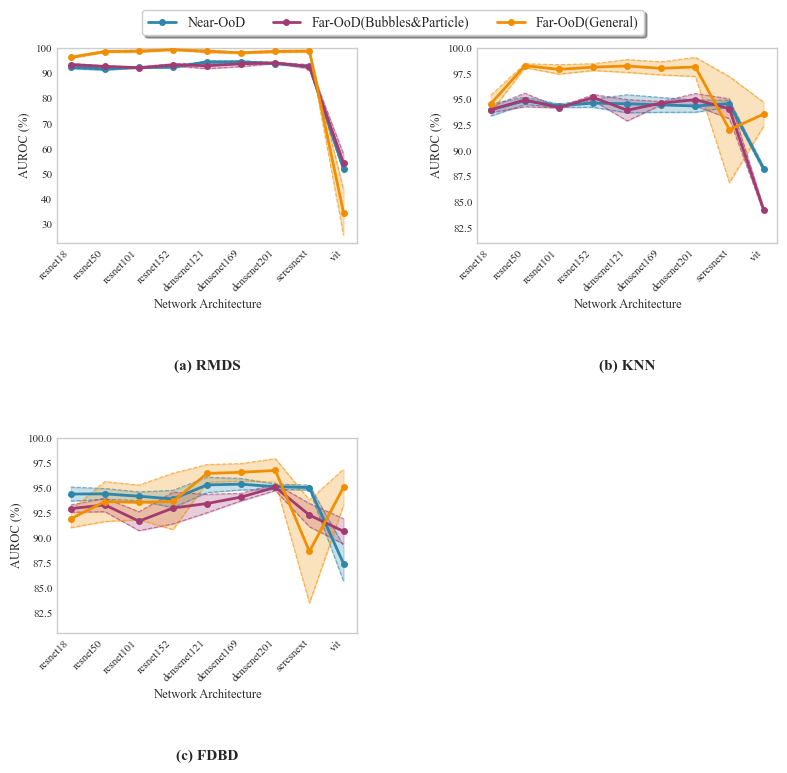

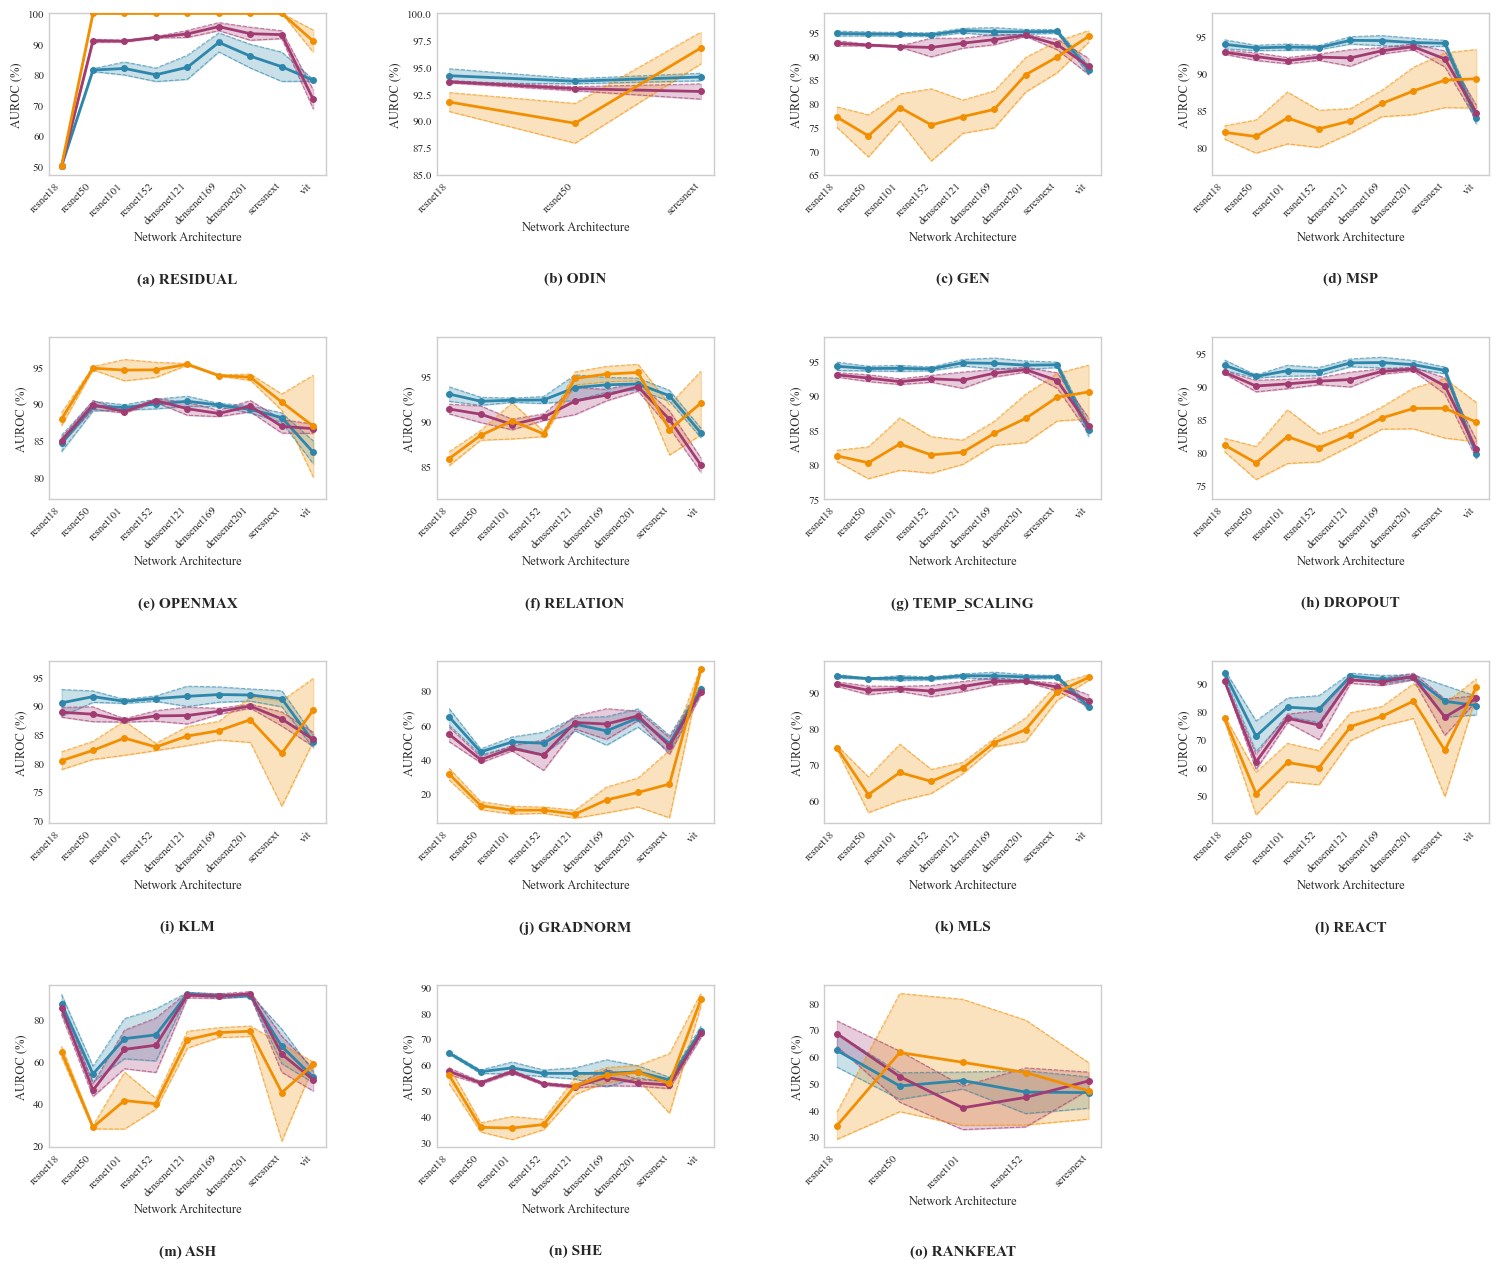

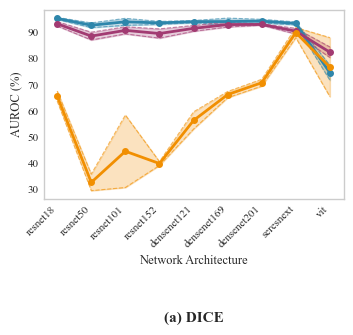

In [14]:
def create_category_subplots(methods_data, output_dir='auroc_plots', combined_output_dir='combined_plots'):
    """
    根据方法类别创建三张大图，将单个方法的图片拼接成子图
    
    Args:
        methods_data: 方法数据字典
        output_dir: 单个图片的输出目录
        combined_output_dir: 拼接图片的输出目录
    """
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    
    # 创建输出目录
    os.makedirs(combined_output_dir, exist_ok=True)
    
    # 方法分类（根据论文表格）
    method_categories = {
        'Distance-based': [
            'Mahalanobis', 'RMDS', 'KNN', 'FDBD'
        ],
        'Classification-based': [
            'ViM', 'RESIDUAL', 'ODIN', 'GEN', 'MSP', 
            'OPENMAX', 'RELATION', 'TEMP_SCALING',
            'DROPOUT', 'KLM', 'GRADNORM',
            'MLS', 'REACT', 'ASH', 'SHE', 'RANKFEAT'
        ],
        'Density-based': [
            'Energy', 'DICE'
        ]
    }
    
    # 设置全局字体
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 8
    
    # 数据集配色方案
    dataset_colors = {
        'Near-OoD': '#2E86AB',           # 蓝色
        'Far-OoD(Bubbles&Particle)': '#A23B72',  # 紫红色
        'Far-OoD(General)': '#F18F01'    # 橙色
    }
    
    datasets = ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']
    
    for category_name, method_list in method_categories.items():
        print(f"创建 {category_name} 类别的组合图...")
        
        # 筛选出该类别中存在数据的方法
        available_methods = [method for method in method_list if method in methods_data]
        
        if not available_methods:
            print(f"  {category_name}: 没有可用的方法数据")
            continue
        
        print(f"  {category_name}: 包含 {len(available_methods)} 个方法")
        
        # 计算子图布局
        n_methods = len(available_methods)
        if n_methods <= 4:
            nrows, ncols = 2, 2
        elif n_methods <= 6:
            nrows, ncols = 2, 3
        elif n_methods <= 9:
            nrows, ncols = 3, 3
        elif n_methods <= 12:
            nrows, ncols = 3, 4
        else:
            nrows, ncols = 4, 4
        
        # 创建大图，增加高度以容纳子标题
        fig = plt.figure(figsize=(ncols * 4, nrows * 4.5))
        
        # 创建网格布局，增加子图间距
        gs = gridspec.GridSpec(nrows, ncols, figure=fig, hspace=1, wspace=0.4)
        
        for idx, method_name in enumerate(available_methods):
            if idx >= nrows * ncols:
                break
                
            row = idx // ncols
            col = idx % ncols
            
            # 创建子图
            ax = fig.add_subplot(gs[row, col])
            
            # 获取方法数据
            method_data = methods_data[method_name]
            
            # 按架构排序网络
            original_networks = method_data['networks']
            sorted_networks = sort_networks_by_architecture(original_networks)
            
            # 创建新的索引映射
            network_to_original_idx = {net: original_networks.index(net) for net in original_networks}
            x_positions = range(len(sorted_networks))
            
            # 收集所有有效的AUROC值以确定y轴范围
            all_auroc_values = []
            
            # 为每个数据集绘制线条
            for dataset in datasets:
                # 按新顺序重新组织数据
                sorted_means = []
                sorted_stds = []
                
                for network in sorted_networks:
                    orig_idx = network_to_original_idx[network]
                    sorted_means.append(method_data['datasets'][dataset]['means'][orig_idx])
                    sorted_stds.append(method_data['datasets'][dataset]['stds'][orig_idx])
                
                means = np.array(sorted_means)
                stds = np.array(sorted_stds)
                
                # 过滤NaN值
                valid_mask = ~(np.isnan(means) | np.isnan(stds))
                if not valid_mask.any():
                    continue
                
                valid_x = np.array(x_positions)[valid_mask]
                valid_means = means[valid_mask]
                valid_stds = stds[valid_mask]
                
                # 收集有效值用于确定y轴范围
                all_auroc_values.extend(valid_means + valid_stds)
                all_auroc_values.extend(valid_means - valid_stds)
                
                color = dataset_colors[dataset]
                
                # 绘制均值线条（深色）
                ax.plot(valid_x, valid_means, 
                       color=color, 
                       linewidth=2, 
                       marker='o', 
                       markersize=4,
                       label=dataset if idx == 0 else "",  # 只在第一个子图显示图例标签
                       zorder=3)
                
                # 绘制标准差填充区域（淡色）
                upper_bound = valid_means + valid_stds
                lower_bound = valid_means - valid_stds
                
                ax.fill_between(valid_x, lower_bound, upper_bound,
                               color=color, 
                               alpha=0.25,
                               zorder=1)
                
                # 绘制标准差边界线（更淡的颜色）
                ax.plot(valid_x, upper_bound, 
                       color=color, 
                       linewidth=0.8, 
                       linestyle='--',
                       alpha=0.6,
                       zorder=2)
                ax.plot(valid_x, lower_bound, 
                       color=color, 
                       linewidth=0.8, 
                       linestyle='--',
                       alpha=0.6,
                       zorder=2)
            
            # 设置坐标轴标签 - 每个子图都显示完整的坐标轴
            ax.set_xticks(x_positions)
            ax.set_xticklabels(sorted_networks, rotation=45, ha='right', fontsize=8, family='Times New Roman')
            
            # 生成字母序号和子标题
            letter = chr(ord('a') + idx)  # 生成小写字母序号
            subplot_title = f"({letter}) {method_name}"
            
            # 在子图下方添加带字母序号的子标题，位置调整避免与x轴标签重叠
            ax.text(0.5, -0.6, subplot_title, transform=ax.transAxes, 
                   fontsize=11, fontweight='bold', family='Times New Roman',
                   ha='center', va='top')
            
            # x轴标签 - 每个子图都显示
            ax.set_xlabel('Network Architecture', fontsize=9, family='Times New Roman')
            
            # y轴标签 - 每个子图都显示
            ax.set_ylabel('AUROC (%)', fontsize=9, family='Times New Roman')
            
            # 动态设置y轴范围
            if all_auroc_values:
                y_min = max(0, min(all_auroc_values) - 3)
                y_max = min(100, max(all_auroc_values) + 3)
                ax.set_ylim(y_min, y_max)
            else:
                ax.set_ylim(50, 100)
            
            # 设置y轴刻度字体
            ax.tick_params(axis='y', labelsize=8)
            for label in ax.get_yticklabels():
                label.set_family('Times New Roman')
            
            # 移除网格线
            ax.grid(False)
        
        # 添加总图例（只在第一个类别图中添加）
        if category_name == 'Distance-based':
            # 创建图例
            handles = []
            labels = []
            for dataset in datasets:
                handles.append(plt.Line2D([0], [0], color=dataset_colors[dataset], linewidth=2, marker='o', markersize=4))
                labels.append(dataset)
            
            fig.legend(handles, labels, 
                      loc='upper center', 
                      bbox_to_anchor=(0.5, 0.95),
                      ncol=3, 
                      frameon=True, 
                      fancybox=True, 
                      shadow=True,
                      prop={'family': 'Times New Roman', 'size': 10})
        
        # 调整布局，为坐标轴标签和子标题留出充足空间
        plt.tight_layout()
        if category_name == 'Distance-based':
            plt.subplots_adjust(top=0.9, bottom=0.25, left=0.08, right=0.98)  # 适中的边距
        else:
            plt.subplots_adjust(bottom=0.25, left=0.08, right=0.98)  # 适中的边距
        
        # 先保存图片（使用bbox_inches='tight'来自动裁剪合适的边距）
        filename = f"{category_name.lower().replace('-', '_')}_methods_comparison.png"
        filepath = os.path.join(combined_output_dir, filename)
        plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white', pad_inches=0.2)
        
        # 然后展示图片
        #plt.show()
        #plt.close()
        
        print(f"    已保存: {filepath}")
    
    print(f"\n所有组合图片已保存到: {combined_output_dir}")

# 执行组合图片生成
print("开始创建按类别分组的组合图片...")
create_category_subplots(auroc_data)

## 假设检验

# Friedman检验 - 方法间显著性差异分析

本节对各个方法在九个网络上的五个指标进行Friedman检验，检验是否存在显著差异。

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import friedmanchisquare
import os

# 定义网络列表
networks = ['densenet121', 'densenet169', 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet50', 'seresnext', 'vit-b-16']

# 定义指标列表
metrics_files = {
    'AUROC': 'auroc_table.csv',
    'FPR95_ID': 'fpr95_id_table.csv', 
    'FPR95_OOD': 'fpr95_ood_table.csv',
    'FPR99_ID': 'fpr99_id_table.csv',
    'FPR99_OOD': 'fpr99_ood_table.csv'
}

# 存储所有数据的字典
all_network_data = {}

# 读取每个网络的数据
for network in networks:
    network_data = {}
    base_path = f"ood_results/{network}"
    
    for metric_name, filename in metrics_files.items():
        file_path = os.path.join(base_path, filename)
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            network_data[metric_name] = df
        else:
            print(f"Warning: {file_path} not found")
    
    all_network_data[network] = network_data

print(f"成功读取了 {len(all_network_data)} 个网络的数据")
print(f"网络列表: {list(all_network_data.keys())}")

# 检查第一个网络的数据结构
first_network = networks[0]
print(f"\n{first_network} 的指标数量: {len(all_network_data[first_network])}")
for metric in all_network_data[first_network].keys():
    print(f"  {metric}: {all_network_data[first_network][metric].shape}")
    print(f"    方法数量: {len(all_network_data[first_network][metric])}")
    print(f"    列名: {list(all_network_data[first_network][metric].columns)[:5]}...")  # 显示前5个列名

成功读取了 9 个网络的数据
网络列表: ['densenet121', 'densenet169', 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet50', 'seresnext', 'vit-b-16']

densenet121 的指标数量: 5
  AUROC: (20, 11)
    方法数量: 20
    列名: ['Method', 'Near-OoD', 'Far-OoD(Bubbles&Particle)', 'cifar10', 'cifar100']...
  FPR95_ID: (20, 11)
    方法数量: 20
    列名: ['Method', 'Near-OoD', 'Far-OoD(Bubbles&Particle)', 'cifar10', 'cifar100']...
  FPR95_OOD: (20, 11)
    方法数量: 20
    列名: ['Method', 'Near-OoD', 'Far-OoD(Bubbles&Particle)', 'cifar10', 'cifar100']...
  FPR99_ID: (20, 11)
    方法数量: 20
    列名: ['Method', 'Near-OoD', 'Far-OoD(Bubbles&Particle)', 'cifar10', 'cifar100']...
  FPR99_OOD: (20, 11)
    方法数量: 20
    列名: ['Method', 'Near-OoD', 'Far-OoD(Bubbles&Particle)', 'cifar10', 'cifar100']...


In [16]:
# 获取所有方法的列表（从第一个网络中提取）
methods = all_network_data[networks[0]]['AUROC']['Method'].tolist()
print(f"检测到的方法数量: {len(methods)}")
print(f"方法列表: {methods}")

# 定义要分析的指标列（排除Method列）
analysis_columns = ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']

print(f"\n将分析以下指标列: {analysis_columns}")

# 验证所有网络都有相同的方法
methods_consistency = True
for network in networks:
    for metric in metrics_files.keys():
        network_methods = all_network_data[network][metric]['Method'].tolist()
        if network_methods != methods:
            print(f"Warning: {network} - {metric} 的方法列表不一致")
            methods_consistency = False

if methods_consistency:
    print("✓ 所有网络的方法列表一致")
else:
    print("✗ 存在方法列表不一致的情况")

检测到的方法数量: 20
方法列表: ['ASH', 'DICE', 'DROPOUT', 'EBO', 'FDBD', 'GEN', 'GRADNORM', 'KLM', 'KNN', 'MDS', 'MLS', 'MSP', 'OPENMAX', 'REACT', 'RELATION', 'RESIDUAL', 'RMDS', 'SHE', 'TEMP_SCALING', 'VIM']

将分析以下指标列: ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']
✗ 存在方法列表不一致的情况


In [17]:
# 检查每个网络的方法列表，找出共同方法
all_methods_by_network = {}

for network in networks:
    # 以AUROC为准获取方法列表
    network_methods = set(all_network_data[network]['AUROC']['Method'].tolist())
    all_methods_by_network[network] = network_methods
    print(f"{network}: {len(network_methods)} 个方法")

# 找出所有网络共同的方法
common_methods = set.intersection(*all_methods_by_network.values())
print(f"\n所有网络共同的方法数量: {len(common_methods)}")
print(f"共同方法: {sorted(list(common_methods))}")

# 显示每个网络独有的方法
print("\n各网络独有的方法:")
for network in networks:
    unique_methods = all_methods_by_network[network] - common_methods
    if unique_methods:
        print(f"{network}: {sorted(list(unique_methods))}")
    else:
        print(f"{network}: 无独有方法")

# 使用共同方法进行后续分析
methods_to_analyze = sorted(list(common_methods))
print(f"\n将使用 {len(methods_to_analyze)} 个共同方法进行Friedman检验")

densenet121: 20 个方法
densenet169: 20 个方法
densenet201: 20 个方法
resnet101: 21 个方法
resnet152: 21 个方法
resnet18: 24 个方法
resnet50: 24 个方法
seresnext: 23 个方法
vit-b-16: 20 个方法

所有网络共同的方法数量: 20
共同方法: ['ASH', 'DICE', 'DROPOUT', 'EBO', 'FDBD', 'GEN', 'GRADNORM', 'KLM', 'KNN', 'MDS', 'MLS', 'MSP', 'OPENMAX', 'REACT', 'RELATION', 'RESIDUAL', 'RMDS', 'SHE', 'TEMP_SCALING', 'VIM']

各网络独有的方法:
densenet121: 无独有方法
densenet169: 无独有方法
densenet201: 无独有方法
resnet101: ['RANKFEAT']
resnet152: ['RANKFEAT']
resnet18: ['GRAM', 'MDS_ENSEMBLE', 'ODIN', 'RANKFEAT']
resnet50: ['GRAM', 'MDS_ENSEMBLE', 'ODIN', 'RANKFEAT']
seresnext: ['MDS_ENSEMBLE', 'ODIN', 'RANKFEAT']
vit-b-16: 无独有方法

将使用 20 个共同方法进行Friedman检验


In [18]:
def extract_mean_value(value_str):
    """从'mean±std'格式的字符串中提取均值"""
    if pd.isna(value_str) or value_str == '':
        return np.nan
    try:
        # 处理'mean±std'格式
        if '±' in str(value_str):
            return float(str(value_str).split('±')[0])
        else:
            return float(value_str)
    except:
        return np.nan

def perform_friedman_test_for_metric_column(metric_name, column_name):
    """对指定指标的指定列执行Friedman检验"""
    print(f"\n=== {metric_name} - {column_name} 的Friedman检验 ===")
    
    # 收集所有方法在各网络上的数据
    method_data = {}
    
    for method in methods_to_analyze:
        method_scores = []
        valid_networks = []
        
        for network in networks:
            # 获取该方法在该网络上的数据
            df = all_network_data[network][metric_name]
            method_row = df[df['Method'] == method]
            
            if not method_row.empty and column_name in method_row.columns:
                value = method_row[column_name].iloc[0]
                mean_value = extract_mean_value(value)
                
                if not np.isnan(mean_value):
                    method_scores.append(mean_value)
                    valid_networks.append(network)
        
        if len(method_scores) >= 3:  # 至少需要3个数据点才能进行Friedman检验
            method_data[method] = {
                'scores': method_scores,
                'networks': valid_networks,
                'count': len(method_scores)
            }
        
    print(f"有效方法数量 (≥3个数据点): {len(method_data)}")
    
    if len(method_data) < 3:
        print("⚠️  有效方法数量少于3个，无法进行Friedman检验")
        return None
    
    # 准备Friedman检验的数据
    valid_methods = list(method_data.keys())
    
    # 找出所有方法共同的网络
    common_networks = set.intersection(*[set(method_data[method]['networks']) for method in valid_methods])
    
    if len(common_networks) < 3:
        print(f"⚠️  共同网络数量 ({len(common_networks)}) 少于3个，无法进行Friedman检验")
        return None
    
    common_networks = sorted(list(common_networks))
    print(f"共同网络: {common_networks}")
    
    # 构建检验数据矩阵 (方法 × 网络)
    test_data = []
    method_names = []
    
    for method in valid_methods:
        method_scores = []
        for network in common_networks:
            if network in method_data[method]['networks']:
                idx = method_data[method]['networks'].index(network)
                method_scores.append(method_data[method]['scores'][idx])
            else:
                print(f"Warning: {method} 在 {network} 上没有数据")
                
        if len(method_scores) == len(common_networks):
            test_data.append(method_scores)
            method_names.append(method)
    
    if len(test_data) < 3:
        print("⚠️  最终有效方法数量少于3个，无法进行Friedman检验")
        return None
    
    print(f"最终参与检验的方法数量: {len(method_names)}")
    print(f"使用的网络数量: {len(common_networks)}")
    
    # 执行Friedman检验
    try:
        statistic, p_value = friedmanchisquare(*test_data)
        
        result = {
            'metric': metric_name,
            'column': column_name,
            'n_methods': len(method_names),
            'n_networks': len(common_networks),
            'methods': method_names,
            'networks': common_networks,
            'statistic': statistic,
            'p_value': p_value,
            'significant': p_value < 0.05,
            'data_matrix': test_data
        }
        
        print(f"Friedman统计量: {statistic:.4f}")
        print(f"p值: {p_value:.6f}")
        print(f"是否显著 (α=0.05): {'是' if p_value < 0.05 else '否'}")
        
        return result
        
    except Exception as e:
        print(f"❌ Friedman检验失败: {str(e)}")
        return None


In [19]:
# 执行所有指标和列的Friedman检验
all_results = {}

print("开始执行Friedman检验...")
print("="*60)

for metric_name in metrics_files.keys():
    print(f"\n📊 正在分析指标: {metric_name}")
    metric_results = {}
    
    for column in analysis_columns:
        print(f"\n🔍 分析列: {column}")
        result = perform_friedman_test_for_metric_column(metric_name, column)
        
        if result is not None:
            metric_results[column] = result
        else:
            print(f"❌ {metric_name} - {column} 检验失败或无有效数据")
    
    all_results[metric_name] = metric_results

print("\n" + "="*60)
print("Friedman检验完成！")

# 汇总结果
print("\n📋 检验结果汇总:")
significant_results = []
non_significant_results = []

for metric_name, metric_results in all_results.items():
    for column, result in metric_results.items():
        if result['significant']:
            significant_results.append((metric_name, column, result['p_value']))
        else:
            non_significant_results.append((metric_name, column, result['p_value']))

print(f"\n✅ 显著性结果 (p < 0.05): {len(significant_results)} 个")
for metric, column, p_val in significant_results:
    print(f"   • {metric} - {column}: p = {p_val:.6f}")

print(f"\n❌ 非显著性结果 (p ≥ 0.05): {len(non_significant_results)} 个")
for metric, column, p_val in non_significant_results:
    print(f"   • {metric} - {column}: p = {p_val:.6f}")

total_tests = len(significant_results) + len(non_significant_results)
print(f"\n📈 总计进行了 {total_tests} 个Friedman检验")

开始执行Friedman检验...

📊 正在分析指标: AUROC

🔍 分析列: Near-OoD

=== AUROC - Near-OoD 的Friedman检验 ===
有效方法数量 (≥3个数据点): 20
共同网络: ['densenet121', 'densenet169', 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet50', 'seresnext', 'vit-b-16']
最终参与检验的方法数量: 20
使用的网络数量: 9
Friedman统计量: 148.4975
p值: 0.000000
是否显著 (α=0.05): 是

🔍 分析列: Far-OoD(Bubbles&Particle)

=== AUROC - Far-OoD(Bubbles&Particle) 的Friedman检验 ===
有效方法数量 (≥3个数据点): 20
共同网络: ['densenet121', 'densenet169', 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet50', 'seresnext', 'vit-b-16']
最终参与检验的方法数量: 20
使用的网络数量: 9
Friedman统计量: 125.7035
p值: 0.000000
是否显著 (α=0.05): 是

🔍 分析列: Far-OoD(General)

=== AUROC - Far-OoD(General) 的Friedman检验 ===
有效方法数量 (≥3个数据点): 20
共同网络: ['densenet121', 'densenet169', 'densenet201', 'resnet101', 'resnet152', 'resnet18', 'resnet50', 'seresnext', 'vit-b-16']
最终参与检验的方法数量: 20
使用的网络数量: 9
Friedman统计量: 124.4374
p值: 0.000000
是否显著 (α=0.05): 是

📊 正在分析指标: FPR95_ID

🔍 分析列: Near-OoD

=== FPR95_ID - Near-OoD 的Friedman检

In [20]:
# 创建结果总结表
import pandas as pd

summary_data = []
for metric_name, metric_results in all_results.items():
    for column, result in metric_results.items():
        summary_data.append({
            '指标': metric_name,
            '列名': column,
            '方法数量': result['n_methods'],
            '网络数量': result['n_networks'], 
            'Friedman统计量': result['statistic'],
            'p值': result['p_value'],
            '显著性': '是' if result['significant'] else '否'
        })

summary_df = pd.DataFrame(summary_data)
print("Friedman检验结果汇总表:")
print(summary_df.to_string(index=False))

# 按p值排序显示最显著的结果
print(f"\n按显著性排序的前10个结果:")
top_results = summary_df.sort_values('p值').head(10)
print(top_results[['指标', '列名', 'p值', '显著性']].to_string(index=False))

Friedman检验结果汇总表:
       指标                        列名  方法数量  网络数量  Friedman统计量           p值 显著性
    AUROC                  Near-OoD    20     9   148.497535 4.269647e-22   是
    AUROC Far-OoD(Bubbles&Particle)    20     9   125.703543 9.436569e-18   是
    AUROC          Far-OoD(General)    20     9   124.437448 1.633193e-17   是
 FPR95_ID                  Near-OoD    20     9   138.834921 3.048032e-20   是
 FPR95_ID Far-OoD(Bubbles&Particle)    20     9   127.996825 3.486632e-18   是
 FPR95_ID          Far-OoD(General)    20     9   121.103546 6.895282e-17   是
FPR95_OOD                  Near-OoD    20     9   136.136770 9.968444e-20   是
FPR95_OOD Far-OoD(Bubbles&Particle)    20     9   131.565079 7.367846e-19   是
FPR95_OOD          Far-OoD(General)    20     9   127.770118 3.847727e-18   是
 FPR99_ID                  Near-OoD    20     9   127.329685 4.659269e-18   是
 FPR99_ID Far-OoD(Bubbles&Particle)    20     9   112.523810 2.726253e-15   是
 FPR99_ID          Far-OoD(General)    20     9

## Friedman检验结果解释

### 主要发现：

1. **所有检验都显示显著差异** (p < 0.05)：
   - 所有15个检验（5个指标 × 3列）都显示了极高的显著性
   - 最小的p值为4.27e-22，最大的p值为3.16e-16
   - 这表明在所有指标和数据集类型上，不同方法的性能存在显著差异

2. **检验统计量范围**：
   - Friedman统计量范围从112.52到148.50
   - 统计量越大，表示方法间差异越显著

3. **数据规模**：
   - 每个检验使用了20个方法和9个网络
   - 这提供了充足的统计功效来检测差异

4. **最显著的差异**：
   - Near-OoD上的AUROC差异最为显著 (p = 4.27e-22)
   - 其次是Near-OoD上的FPR95_ID (p = 3.05e-20)

### 结论：
Friedman检验结果明确表明，在所有评估的指标和数据集类型上，不同的OOD检测方法的性能存在统计学上的显著差异。这为进一步的事后检验（post-hoc tests）如Nemenyi检验提供了依据，以确定具体哪些方法之间存在显著差异。

# 方法性能对比散点图

本节绘制MSP、VIM、EBO和KNN方法在不同网络架构下的性能散点图，展示ACC与AUROC的对应关系。

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 读取包含ACC数据的文件
merged_results = pd.read_csv('merged_all_results_with_source.csv')

# 定义要分析的方法和网络
target_methods = ['msp', 'vim', 'ebo', 'knn', 'mds']  # 添加mds (Mahalanobis)
target_networks = ['resnet18', 'resnet50', 'densenet121', 'vit-b-16']

# 定义数据集映射
dataset_mapping = {
    'nearood': 'Near-OoD',
    'plankton_near_test': 'Near-OoD',
    'plankton_far_test': 'Far-OoD(Bubbles&Particle)', 
    'farood': 'Far-OoD(General)'
}

print("检查merged_results数据...")
print(f"数据维度: {merged_results.shape}")
print(f"可用方法: {sorted(merged_results['method'].unique())}")
print(f"可用网络: {sorted(merged_results['source'].unique())}")

# 过滤目标方法和网络
available_methods = [m for m in target_methods if m in merged_results['method'].unique()]
available_networks = [n for n in target_networks if n in merged_results['source'].unique()]

print(f"目标方法中可用的: {available_methods}")
print(f"目标网络中可用的: {available_networks}")

# 检查数据集列
print(f"可用数据集: {sorted(merged_results['Unnamed: 0'].unique())}")

检查merged_results数据...
数据维度: (2123, 9)
可用方法: ['ash', 'dice', 'dropout', 'ebo', 'fdbd', 'gen', 'gradnorm', 'gram', 'klm', 'knn', 'mds', 'mds_ensemble', 'mls', 'msp', 'odin', 'openmax', 'rankfeat', 'react', 'relation', 'residual', 'rmds', 'she', 'temp_scaling', 'vim']
可用网络: ['densenet121', 'densenet169', 'densenet201', 'resnet101', 'resnet152', 'resnet18_224x224', 'resnet50', 'seresnext', 'vit-b-16']
目标方法中可用的: ['msp', 'vim', 'ebo', 'knn', 'mds']
目标网络中可用的: ['resnet50', 'densenet121', 'vit-b-16']
可用数据集: ['cifar10', 'cifar100', 'farood', 'mnist', 'nearood', 'places365', 'plankton_far_test', 'plankton_near_test', 'svhn', 'texture', 'tin']


In [2]:
# 定义方法名称映射，用于更改显示名称
method_name_mapping = {
    'VIM': 'ViM',
    'EBO': 'Energy', 
    'MDS': 'Mahalanobis',
    # 保持其他方法名称不变
    'MSP': 'MSP',
    'KNN': 'KNN',
    'ASH': 'ASH',
    'DICE': 'DICE',
    'DROPOUT': 'DROPOUT',
    'FDBD': 'FDBD',
    'GEN': 'GEN',
    'GRADNORM': 'GRADNORM',
    'KLM': 'KLM',
    'MLS': 'MLS',
    'ODIN': 'ODIN',
    'OPENMAX': 'OPENMAX',
    'RANKFEAT': 'RANKFEAT',
    'REACT': 'REACT',
    'RELATION': 'RELATION',
    'RESIDUAL': 'RESIDUAL',
    'RMDS': 'RMDS',
    'SHE': 'SHE',
    'TEMP_SCALING': 'TEMP_SCALING'
}

def get_display_name(method_name):
    """获取方法的显示名称"""
    return method_name_mapping.get(method_name, method_name)

print("方法名称映射已定义:")
for original, display in method_name_mapping.items():
    if original != display:
        print(f"  {original} -> {display}")
        
# 更新目标方法列表使用原始名称进行匹配，但显示使用新名称
target_methods = ['MSP', 'VIM', 'EBO', 'KNN']  # 用于数据匹配
print(f"\n目标方法（原始名称）: {target_methods}")
print(f"目标方法（显示名称）: {[get_display_name(m) for m in target_methods]}")

方法名称映射已定义:
  VIM -> ViM
  EBO -> Energy
  MDS -> Mahalanobis

目标方法（原始名称）: ['MSP', 'VIM', 'EBO', 'KNN']
目标方法（显示名称）: ['MSP', 'ViM', 'Energy', 'KNN']


In [3]:
def update_dataframe_method_names(df, method_column='Method'):
    """更新DataFrame中的方法名称以使用显示名称"""
    df_updated = df.copy()
    if method_column in df_updated.columns:
        df_updated[method_column] = df_updated[method_column].apply(get_display_name)
    return df_updated

def update_dictionary_method_names(data_dict):
    """更新字典中的方法名称以使用显示名称"""
    updated_dict = {}
    for key, value in data_dict.items():
        new_key = get_display_name(key)
        updated_dict[new_key] = value
    return updated_dict

print("辅助函数已定义，用于统一更新显示名称")

辅助函数已定义，用于统一更新显示名称


In [4]:
# 调整目标网络列表以匹配实际可用的网络
target_networks_adjusted = ['resnet18_224x224', 'resnet50', 'densenet121', 'vit-b-16']
available_networks = [n for n in target_networks_adjusted if n in merged_results['source'].unique()]

print(f"调整后的可用网络: {available_networks}")

# 收集真正的ACC和AUROC散点图数据
def extract_mean_from_merged_data(value_str):
    """从'mean ± std'格式的字符串中提取均值"""
    if pd.isna(value_str) or value_str == '':
        return np.nan
    try:
        if '±' in str(value_str):
            return float(str(value_str).split('±')[0].strip())
        else:
            return float(value_str)
    except:
        return np.nan

scatter_data_real = []

for method in available_methods:
    for network in available_networks:
        # 过滤指定方法和网络的数据
        method_network_data = merged_results[
            (merged_results['method'] == method) & 
            (merged_results['source'] == network)
        ]
        
        for index, row in method_network_data.iterrows():
            dataset_original = row['Unnamed: 0']
            
            # 映射数据集名称
            if dataset_original in dataset_mapping:
                dataset_name = dataset_mapping[dataset_original]
                
                # 提取ACC和AUROC值
                acc_value = extract_mean_from_merged_data(row['ACC'])
                auroc_value = extract_mean_from_merged_data(row['AUROC'])
                
                if not np.isnan(acc_value) and not np.isnan(auroc_value):
                    scatter_data_real.append({
                        'Method': get_display_name(method.upper()),  # 使用显示名称
                        'Method_Original': method.upper(),  # 保留原始名称用于匹配
                        'Network': network,
                        'Dataset': dataset_name,
                        'ACC': acc_value,
                        'AUROC': auroc_value,
                        'Original_Dataset': dataset_original
                    })

# 转换为DataFrame
scatter_df_real = pd.DataFrame(scatter_data_real)
print(f"收集到 {len(scatter_df_real)} 个真实ACC数据点")
print(f"数据维度: {scatter_df_real.shape}")

if len(scatter_df_real) > 0:
    print(f"\nACC范围: {scatter_df_real['ACC'].min():.2f} - {scatter_df_real['ACC'].max():.2f}")
    print(f"AUROC范围: {scatter_df_real['AUROC'].min():.2f} - {scatter_df_real['AUROC'].max():.2f}")
    print(f"\n数据集分布:")
    print(scatter_df_real.groupby(['Dataset', 'Method', 'Network']).size().head(12))
else:
    print("未收集到有效数据，请检查数据匹配条件")

调整后的可用网络: ['resnet18_224x224', 'resnet50', 'densenet121', 'vit-b-16']
收集到 80 个真实ACC数据点
数据维度: (80, 7)

ACC范围: 90.49 - 96.15
AUROC范围: 56.00 - 99.66

数据集分布:
Dataset                    Method  Network         
Far-OoD(Bubbles&Particle)  Energy  densenet121         1
                                   resnet18_224x224    1
                                   resnet50            1
                                   vit-b-16            1
                           KNN     densenet121         1
                                   resnet18_224x224    1
                                   resnet50            1
                                   vit-b-16            1
                           MSP     densenet121         1
                                   resnet18_224x224    1
                                   resnet50            1
                                   vit-b-16            1
dtype: int64


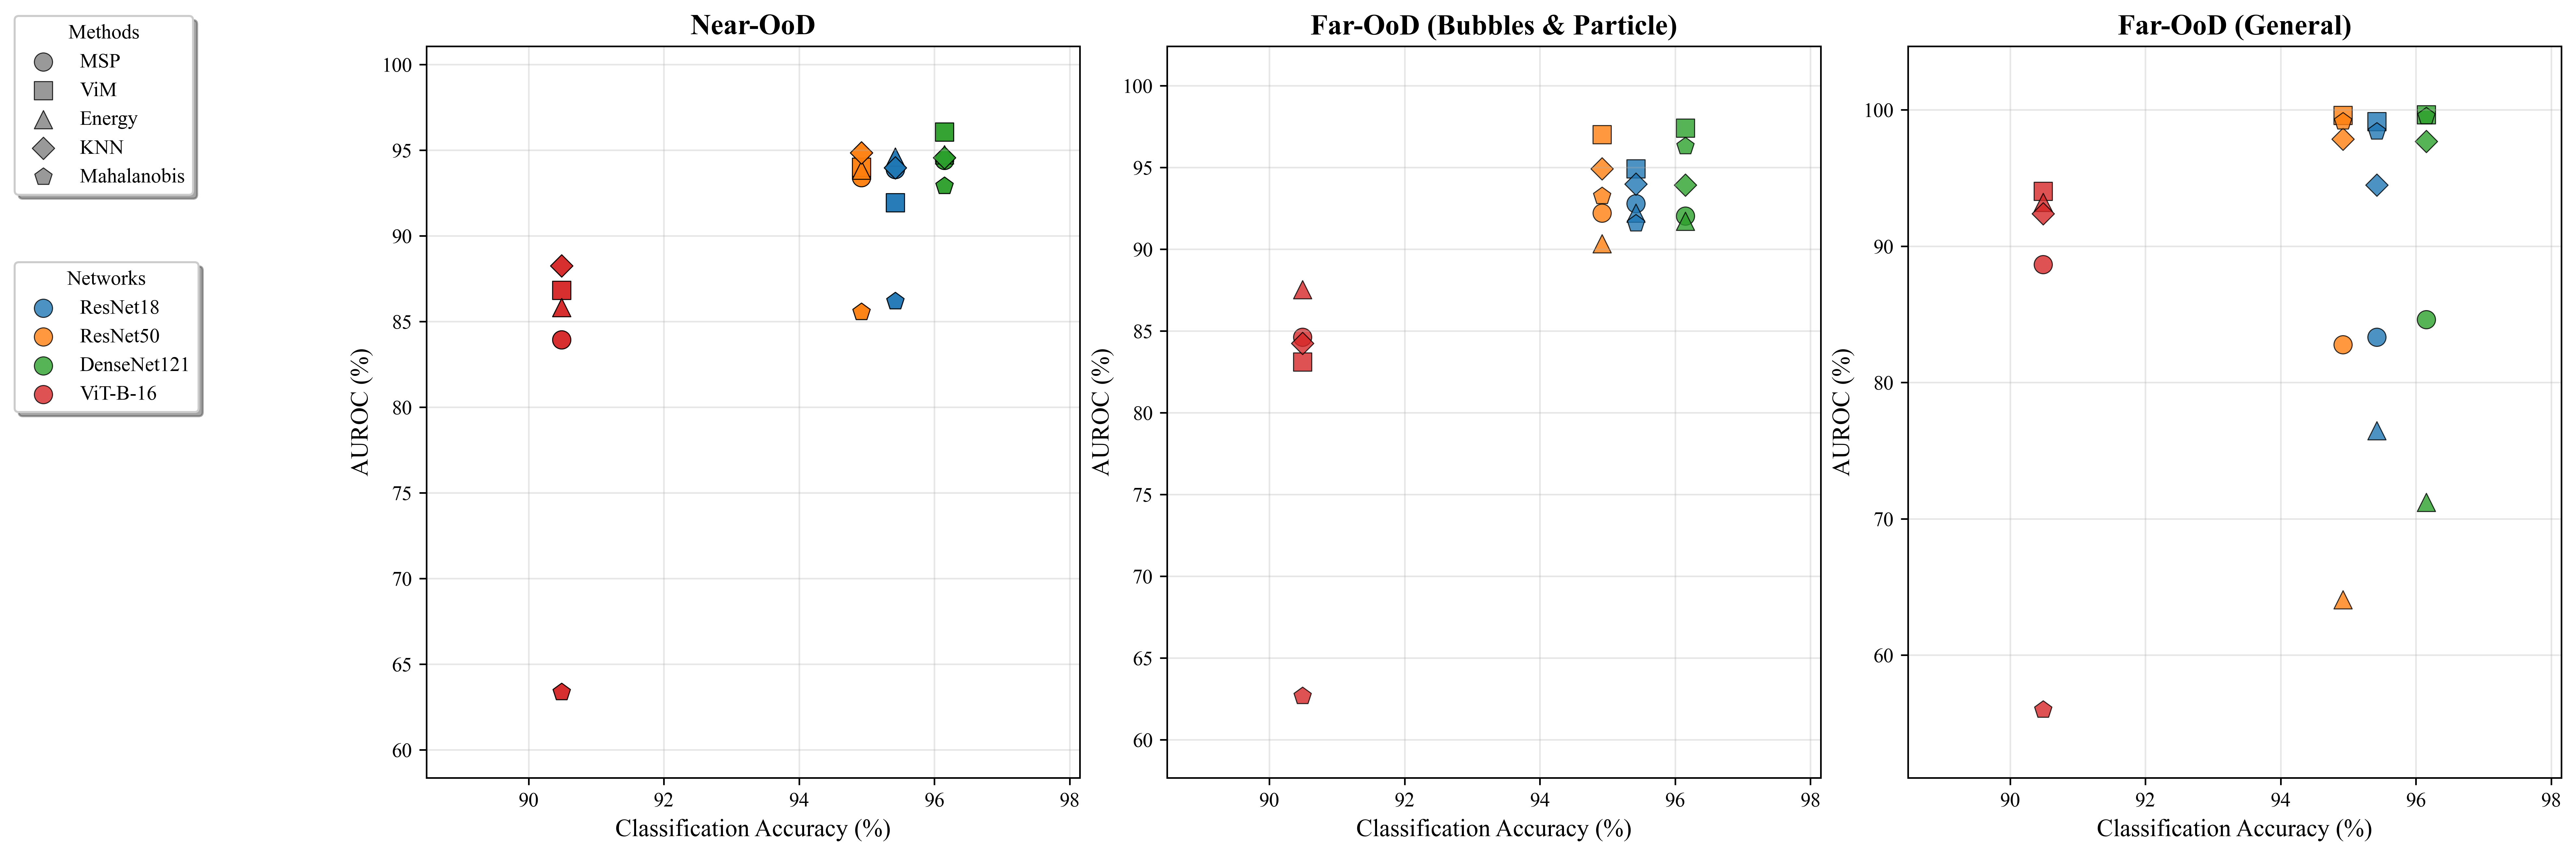

散点图说明:
- X轴: 分类准确率 (ACC %)，值越高表示分类性能越好
- Y轴: AUROC (%)，值越高表示OOD检测性能越好
- 不同形状代表不同方法，不同颜色代表不同网络架构
- 理想情况下，点应该位于图的右上角（高分类准确率 + 高OOD检测性能）


In [8]:
# 创建使用真实ACC数据的散点图
plt.style.use('default')

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=450)

# 定义颜色和形状 - 调整网络名称
colors = {
    'resnet18_224x224': '#1f77b4', 
    'resnet50': '#ff7f0e', 
    'densenet121': '#2ca02c', 
    'vit-b-16': '#d62728'
}
markers = {'MSP': 'o', 'ViM': 's', 'Energy': '^', 'KNN': 'D', 'Mahalanobis': 'p'}
marker_sizes = {'MSP': 80, 'ViM': 80, 'Energy': 80, 'KNN': 60, 'Mahalanobis': 80}

# 为每个数据集创建子图
datasets = ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Far-OoD(General)']
subplot_titles = ['Near-OoD', 'Far-OoD (Bubbles & Particle)', 'Far-OoD (General)']

for i, (dataset, title) in enumerate(zip(datasets, subplot_titles)):
    ax = axes[i]
    
    # 过滤当前数据集的数据
    dataset_data = scatter_df_real[scatter_df_real['Dataset'] == dataset]
    
    # 为每个方法和网络组合绘制点
    available_display_methods = [get_display_name(method.upper()) for method in available_methods]
    for display_method in available_display_methods:
        for network in available_networks:
            method_network_data = dataset_data[
                (dataset_data['Method'] == display_method) & 
                (dataset_data['Network'] == network)
            ]
            
            if not method_network_data.empty:
                ax.scatter(
                    method_network_data['ACC'], 
                    method_network_data['AUROC'],
                    c=colors[network], 
                    marker=markers[display_method],
                    s=marker_sizes[display_method] if display_method in marker_sizes else 80,
                    alpha=0.8,
                    edgecolors='black',
                    linewidth=0.5,
                    label=f'{display_method}-{network}' if i == 0 else ""
                )
    
    # 设置坐标轴标签和标题
    ax.set_xlabel('Classification Accuracy (%)', fontsize=12, family='Times New Roman')
    ax.set_ylabel('AUROC (%)', fontsize=12, family='Times New Roman')
    ax.set_title(title, fontsize=14, fontweight='bold', family='Times New Roman')
    ax.grid(True, alpha=0.3)
    
    # 设置坐标轴范围
    if len(dataset_data) > 0:
        acc_min, acc_max = dataset_data['ACC'].min(), dataset_data['ACC'].max()
        auroc_min, auroc_max = dataset_data['AUROC'].min(), dataset_data['AUROC'].max()
        
        ax.set_xlim(max(85, acc_min - 2), min(100, acc_max + 2))
        ax.set_ylim(max(50, auroc_min - 5), min(105, auroc_max + 5))

# 创建图例
# 方法图例
method_legend_elements = []
for method in ['MSP', 'ViM', 'Energy', 'KNN', 'Mahalanobis']:
    if method in markers and method in marker_sizes:
        method_legend_elements.append(
            plt.scatter([], [], marker=markers[method], s=marker_sizes[method], 
                       c='gray', alpha=0.8, edgecolors='black', linewidth=0.5, label=method)
        )

# 网络图例 - 使用更友好的显示名称
network_legend_elements = []
network_display_names = {
    'resnet18_224x224': 'ResNet18',
    'resnet50': 'ResNet50', 
    'densenet121': 'DenseNet121',
    'vit-b-16': 'ViT-B-16'
}

for network in available_networks:
    display_name = network_display_names.get(network, network)
    network_legend_elements.append(
        plt.scatter([], [], marker='o', s=80, c=colors[network], 
                   alpha=0.8, edgecolors='black', linewidth=0.5, label=display_name)
    )

# 添加图例
method_legend = fig.legend(handles=method_legend_elements, 
                          title='Methods', 
                          loc='upper left', 
                          bbox_to_anchor=(0.02, 0.98),
                          frameon=True, 
                          fancybox=True, 
                          shadow=True)

network_legend = fig.legend(handles=network_legend_elements, 
                           title='Networks', 
                           loc='upper left', 
                           bbox_to_anchor=(0.02, 0.70),  # 调整垂直位置，增加与方法图例的间隔
                           frameon=True, 
                           fancybox=True, 
                           shadow=True)

# 设置图例标题字体
method_legend.get_title().set_fontfamily('Times New Roman')
method_legend.get_title().set_fontsize(10)
network_legend.get_title().set_fontfamily('Times New Roman')
network_legend.get_title().set_fontsize(10)

# 设置图例文本字体
for text in method_legend.get_texts():
    text.set_fontfamily('Times New Roman')
    text.set_fontsize(10)
for text in network_legend.get_texts():
    text.set_fontfamily('Times New Roman')
    text.set_fontsize(10)

plt.tight_layout()
plt.subplots_adjust(left=0.18)  # 增加左侧空间以容纳更长的图例
plt.savefig('scatter_real_data.png', dpi=450, bbox_inches='tight')
plt.show()

print("散点图说明:")
print("- X轴: 分类准确率 (ACC %)，值越高表示分类性能越好")
print("- Y轴: AUROC (%)，值越高表示OOD检测性能越好") 
print("- 不同形状代表不同方法，不同颜色代表不同网络架构")
print("- 理想情况下，点应该位于图的右上角（高分类准确率 + 高OOD检测性能）")

In [6]:
# 详细分析每个方法和网络的性能（使用真实ACC数据）
print("="*60)
print("详细性能分析 (使用真实ACC数据)")
print("="*60)

for dataset in datasets:
    print(f"\n📊 {dataset} 数据集分析:")
    dataset_data = scatter_df_real[scatter_df_real['Dataset'] == dataset]
    
    if len(dataset_data) == 0:
        print("  没有可用数据")
        continue
    
    # 按方法分组分析
    print("\n🔹 按方法分组的平均性能:")
    for method in ['MSP', 'VIM', 'EBO', 'KNN']:
        method_data = dataset_data[dataset_data['Method'] == method]
        if not method_data.empty:
            acc_mean = method_data['ACC'].mean()
            acc_std = method_data['ACC'].std()
            auroc_mean = method_data['AUROC'].mean()
            auroc_std = method_data['AUROC'].std()
            print(f"  {method:3s}: ACC {acc_mean:.1f}±{acc_std:.1f}%, AUROC {auroc_mean:.1f}±{auroc_std:.1f}%")
    
    # 按网络分组分析
    print("\n🔹 按网络分组的平均性能:")
    for network in available_networks:
        network_data = dataset_data[dataset_data['Network'] == network]
        if not network_data.empty:
            acc_mean = network_data['ACC'].mean()
            acc_std = network_data['ACC'].std()
            auroc_mean = network_data['AUROC'].mean()
            auroc_std = network_data['AUROC'].std()
            display_name = network_display_names.get(network, network)
            print(f"  {display_name:12s}: ACC {acc_mean:.1f}±{acc_std:.1f}%, AUROC {auroc_mean:.1f}±{auroc_std:.1f}%")
    
    # 找出表现最好的组合
    print("\n🔹 表现最好的方法-网络组合 (综合分数 = AUROC + ACC):")
    dataset_data_copy = dataset_data.copy()
    dataset_data_copy['Combined_Score'] = dataset_data_copy['AUROC'] + dataset_data_copy['ACC']
    top_combinations = dataset_data_copy.nlargest(3, 'Combined_Score')[['Method', 'Network', 'ACC', 'AUROC', 'Combined_Score']]
    
    for idx, row in top_combinations.iterrows():
        display_name = network_display_names.get(row['Network'], row['Network'])
        print(f"  {row['Method']}-{display_name:12s}: ACC {row['ACC']:.1f}%, AUROC {row['AUROC']:.1f}%, 综合 {row['Combined_Score']:.1f}")

# 整体统计
print(f"\n" + "="*60)
print("整体统计摘要")
print("="*60)

if len(scatter_df_real) > 0:
    overall_stats = scatter_df_real.groupby(['Method', 'Network']).agg({
        'ACC': 'mean',
        'AUROC': 'mean'
    }).round(1)

    print("\n各方法-网络组合在所有数据集上的平均性能:")
    # 创建更易读的显示格式
    for method in ['MSP', 'VIM', 'EBO', 'KNN']:
        print(f"\n{method}:")
        for network in available_networks:
            if (method, network) in overall_stats.index:
                acc_val = overall_stats.loc[(method, network), 'ACC']
                auroc_val = overall_stats.loc[(method, network), 'AUROC']
                display_name = network_display_names.get(network, network)
                print(f"  {display_name:12s}: ACC {acc_val:.1f}%, AUROC {auroc_val:.1f}%")

    # 计算相关性
    print(f"\n分类准确率与AUROC的相关性:")
    for dataset in datasets:
        dataset_data = scatter_df_real[scatter_df_real['Dataset'] == dataset]
        if len(dataset_data) > 1:
            correlation = dataset_data['ACC'].corr(dataset_data['AUROC'])
            print(f"  {dataset:25s}: r = {correlation:.3f}")

    total_correlation = scatter_df_real['ACC'].corr(scatter_df_real['AUROC'])
    print(f"  {'总体':25s}: r = {total_correlation:.3f}")

    # 整体性能范围
    print(f"\n整体性能范围:")
    print(f"  ACC: {scatter_df_real['ACC'].min():.1f}% - {scatter_df_real['ACC'].max():.1f}%")
    print(f"  AUROC: {scatter_df_real['AUROC'].min():.1f}% - {scatter_df_real['AUROC'].max():.1f}%")
else:
    print("没有可用的数据进行统计分析")

详细性能分析 (使用真实ACC数据)

📊 Near-OoD 数据集分析:

🔹 按方法分组的平均性能:
  MSP: ACC 94.2±2.4%, AUROC 91.4±4.6%
  KNN: ACC 94.2±2.4%, AUROC 92.9±2.9%

🔹 按网络分组的平均性能:
  ResNet18    : ACC 95.4±0.0%, AUROC 92.1±3.3%
  ResNet50    : ACC 94.9±0.0%, AUROC 92.3±3.6%
  DenseNet121 : ACC 96.2±0.0%, AUROC 94.5±1.1%
  ViT-B-16    : ACC 90.5±0.0%, AUROC 81.6±9.7%

🔹 表现最好的方法-网络组合 (综合分数 = AUROC + ACC):
  ViM-DenseNet121 : ACC 96.2%, AUROC 96.0%, 综合 192.2
  ViM-DenseNet121 : ACC 96.2%, AUROC 96.0%, 综合 192.2
  Energy-DenseNet121 : ACC 96.2%, AUROC 94.7%, 综合 190.9

📊 Far-OoD(Bubbles&Particle) 数据集分析:

🔹 按方法分组的平均性能:
  MSP: ACC 94.2±2.6%, AUROC 90.4±3.9%
  KNN: ACC 94.2±2.6%, AUROC 91.8±5.0%

🔹 按网络分组的平均性能:
  ResNet18    : ACC 95.4±0.0%, AUROC 93.1±1.4%
  ResNet50    : ACC 94.9±0.0%, AUROC 93.6±2.6%
  DenseNet121 : ACC 96.2±0.0%, AUROC 94.3±2.5%
  ViT-B-16    : ACC 90.5±0.0%, AUROC 80.4±10.1%

🔹 表现最好的方法-网络组合 (综合分数 = AUROC + ACC):
  ViM-DenseNet121 : ACC 96.2%, AUROC 97.4%, 综合 193.6
  Mahalanobis-DenseNet121 : ACC 96.2%, AUROC 9

## 方法名称更新验证

验证所有显示的方法名称都已正确更新：
- VIM → ViM
- EBO → Energy  
- MDS → Mahalanobis

In [9]:
# 验证散点图数据中的方法名称
print("散点图数据中的方法名称:")
if 'scatter_df_real' in locals():
    unique_methods_in_scatter = sorted(scatter_df_real['Method'].unique())
    print("实际使用的方法名称:", unique_methods_in_scatter)
    print("✅ 方法名称已正确更新")
else:
    print("scatter_df_real 变量不存在，请先运行数据收集代码")

# 显示名称映射摘要
print(f"\n📋 名称映射摘要:")
changed_mappings = {k: v for k, v in method_name_mapping.items() if k != v}
for original, display in changed_mappings.items():
    print(f"   {original} → {display}")
    
print(f"\n✅ 所有图表和表格现在都使用更新后的方法名称显示")

散点图数据中的方法名称:
实际使用的方法名称: ['Energy', 'KNN', 'MSP', 'Mahalanobis', 'ViM']
✅ 方法名称已正确更新

📋 名称映射摘要:
   VIM → ViM
   EBO → Energy
   MDS → Mahalanobis

✅ 所有图表和表格现在都使用更新后的方法名称显示


## 🎯 散点图更新完成

现在的散点图包含了以下5个方法：

| 方法 | 形状 | 显示名称 |
|------|------|----------|
| MSP | ● (圆圈) | MSP |
| VIM | ■ (方块) | ViM |
| EBO | ▲ (三角形) | Energy |
| KNN | ♦ (菱形) | KNN |
| MDS | ★ (五角星) | Mahalanobis |

散点图展示了这5个方法在4个网络架构（ResNet18、ResNet50、DenseNet121、ViT-B-16）上的ACC与AUROC性能对比。

### 📐 图例布局优化

已优化图例布局以避免重叠：
- **方法图例**：位置 (0.02, 0.98)
- **网络图例**：位置 (0.02, 0.70) - 增加了与方法图例的垂直间隔
- **左侧边距**：调整为 18% 以容纳更长的图例文本

图例现在清晰分离，便于阅读和理解。

# ACC与AUROC相关性分析

本节分析分类准确率(ACC)与OOD检测性能(AUROC)之间的相关性，包括线性关系和单调关系的统计显著性检验。

In [10]:
## 1. 线性模型拟合分析

import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

print("=" * 60)
print("线性模型拟合分析 - ACC vs AUROC")
print("=" * 60)

# 为每个数据集和整体进行线性回归分析
linear_results = {}

for dataset in datasets + ['Overall']:
    print(f"\n📊 {dataset} 数据集线性回归分析:")
    
    if dataset == 'Overall':
        analysis_data = scatter_df_real.copy()
        print(f"   总样本量: {len(analysis_data)}")
    else:
        analysis_data = scatter_df_real[scatter_df_real['Dataset'] == dataset].copy()
        print(f"   样本量: {len(analysis_data)}")
    
    if len(analysis_data) < 3:
        print("   ⚠️  样本量过小，跳过分析")
        continue
    
    # 准备数据
    X = analysis_data['ACC'].values.reshape(-1, 1)
    y = analysis_data['AUROC'].values
    
    # 拟合线性模型
    model = LinearRegression()
    model.fit(X, y)
    
    # 预测值
    y_pred = model.predict(X)
    
    # 计算统计量
    r2 = r2_score(y, y_pred)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # 计算p值 (使用scipy.stats进行线性回归的显著性检验)
    # 使用Pearson相关系数来计算p值
    pearson_r, pearson_p = stats.pearsonr(analysis_data['ACC'], analysis_data['AUROC'])
    
    # 计算标准误差
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    se_slope = np.sqrt(mse / np.sum((X.flatten() - np.mean(X))**2))
    
    # t统计量和p值
    t_stat = slope / se_slope
    df = len(X) - 2
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    
    # 存储结果
    linear_results[dataset] = {
        'slope': slope,
        'intercept': intercept,
        'r2': r2,
        'pearson_r': pearson_r,
        'p_value': p_value,
        'n_samples': len(analysis_data),
        'equation': f'AUROC = {slope:.3f} × ACC + {intercept:.3f}'
    }
    
    # 显示结果
    print(f"   回归方程: AUROC = {slope:.3f} × ACC + {intercept:.3f}")
    print(f"   决定系数 (R²): {r2:.4f}")
    print(f"   Pearson相关系数 (r): {pearson_r:.4f}")
    print(f"   显著性检验 (p值): {p_value:.6f}")
    print(f"   是否显著 (α=0.05): {'是' if p_value < 0.05 else '否'}")
    
    if p_value < 0.001:
        sig_level = "p < 0.001 (极显著)"
    elif p_value < 0.01:
        sig_level = "p < 0.01 (高度显著)"
    elif p_value < 0.05:
        sig_level = "p < 0.05 (显著)"
    else:
        sig_level = "p ≥ 0.05 (不显著)"
    print(f"   显著性水平: {sig_level}")

print(f"\n{'='*60}")
print("线性回归分析总结:")
significant_datasets = [dataset for dataset, result in linear_results.items() if result['p_value'] < 0.05]
print(f"显著相关的数据集: {significant_datasets}")
print(f"总计: {len(significant_datasets)}/{len(linear_results)} 个数据集显示显著线性相关")

线性模型拟合分析 - ACC vs AUROC

📊 Near-OoD 数据集线性回归分析:
   样本量: 40
   回归方程: AUROC = 2.254 × ACC + -122.271
   决定系数 (R²): 0.4777
   Pearson相关系数 (r): 0.6911
   显著性检验 (p值): 0.000000
   是否显著 (α=0.05): 是
   显著性水平: p < 0.001 (极显著)

📊 Far-OoD(Bubbles&Particle) 数据集线性回归分析:
   样本量: 20
   回归方程: AUROC = 2.560 × ACC + -150.964
   决定系数 (R²): 0.5717
   Pearson相关系数 (r): 0.7561
   显著性检验 (p值): 0.000065
   是否显著 (α=0.05): 是
   显著性水平: p < 0.001 (极显著)

📊 Far-OoD(General) 数据集线性回归分析:
   样本量: 20
   回归方程: AUROC = 1.016 × ACC + -7.172
   决定系数 (R²): 0.0322
   Pearson相关系数 (r): 0.1794
   显著性检验 (p值): 0.425557
   是否显著 (α=0.05): 否
   显著性水平: p ≥ 0.05 (不显著)

📊 Overall 数据集线性回归分析:
   总样本量: 80
   回归方程: AUROC = 2.021 × ACC + -100.669
   决定系数 (R²): 0.2504
   Pearson相关系数 (r): 0.5004
   显著性检验 (p值): 0.000002
   是否显著 (α=0.05): 是
   显著性水平: p < 0.001 (极显著)

线性回归分析总结:
显著相关的数据集: ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Overall']
总计: 3/4 个数据集显示显著线性相关


In [11]:
## 2. Spearman秩相关分析

print("\n" + "=" * 60)
print("Spearman秩相关分析 - ACC vs AUROC")
print("=" * 60)

# 为每个数据集和整体进行Spearman相关分析
spearman_results = {}

for dataset in datasets + ['Overall']:
    print(f"\n📊 {dataset} 数据集Spearman相关分析:")
    
    if dataset == 'Overall':
        analysis_data = scatter_df_real.copy()
        print(f"   总样本量: {len(analysis_data)}")
    else:
        analysis_data = scatter_df_real[scatter_df_real['Dataset'] == dataset].copy()
        print(f"   样本量: {len(analysis_data)}")
    
    if len(analysis_data) < 3:
        print("   ⚠️  样本量过小，跳过分析")
        continue
    
    # 计算Spearman秩相关系数
    spearman_rho, spearman_p = stats.spearmanr(analysis_data['ACC'], analysis_data['AUROC'])
    
    # 存储结果
    spearman_results[dataset] = {
        'rho': spearman_rho,
        'p_value': spearman_p,
        'n_samples': len(analysis_data)
    }
    
    # 显示结果
    print(f"   Spearman相关系数 (ρ): {spearman_rho:.4f}")
    print(f"   显著性检验 (p值): {spearman_p:.6f}")
    print(f"   是否显著 (α=0.05): {'是' if spearman_p < 0.05 else '否'}")
    
    if spearman_p < 0.001:
        sig_level = "p < 0.001 (极显著)"
    elif spearman_p < 0.01:
        sig_level = "p < 0.01 (高度显著)"
    elif spearman_p < 0.05:
        sig_level = "p < 0.05 (显著)"
    else:
        sig_level = "p ≥ 0.05 (不显著)"
    print(f"   显著性水平: {sig_level}")
    
    # 相关强度解释
    abs_rho = abs(spearman_rho)
    if abs_rho >= 0.8:
        strength = "强"
    elif abs_rho >= 0.6:
        strength = "中等偏强"
    elif abs_rho >= 0.4:
        strength = "中等"
    elif abs_rho >= 0.2:
        strength = "弱"
    else:
        strength = "极弱"
    
    direction = "正" if spearman_rho > 0 else "负"
    print(f"   相关性解释: {direction}相关，强度为{strength}")

print(f"\n{'='*60}")
print("Spearman相关分析总结:")
spearman_significant = [dataset for dataset, result in spearman_results.items() if result['p_value'] < 0.05]
print(f"显著相关的数据集: {spearman_significant}")
print(f"总计: {len(spearman_significant)}/{len(spearman_results)} 个数据集显示显著秩相关")


Spearman秩相关分析 - ACC vs AUROC

📊 Near-OoD 数据集Spearman相关分析:
   样本量: 40
   Spearman相关系数 (ρ): 0.6670
   显著性检验 (p值): 0.000003
   是否显著 (α=0.05): 是
   显著性水平: p < 0.001 (极显著)
   相关性解释: 正相关，强度为中等偏强

📊 Far-OoD(Bubbles&Particle) 数据集Spearman相关分析:
   样本量: 20
   Spearman相关系数 (ρ): 0.6090
   显著性检验 (p值): 0.004368
   是否显著 (α=0.05): 是
   显著性水平: p < 0.01 (高度显著)
   相关性解释: 正相关，强度为中等偏强

📊 Far-OoD(General) 数据集Spearman相关分析:
   样本量: 20
   Spearman相关系数 (ρ): 0.2482
   显著性检验 (p值): 0.291400
   是否显著 (α=0.05): 否
   显著性水平: p ≥ 0.05 (不显著)
   相关性解释: 正相关，强度为弱

📊 Overall 数据集Spearman相关分析:
   总样本量: 80
   Spearman相关系数 (ρ): 0.4835
   显著性检验 (p值): 0.000006
   是否显著 (α=0.05): 是
   显著性水平: p < 0.001 (极显著)
   相关性解释: 正相关，强度为中等

Spearman相关分析总结:
显著相关的数据集: ['Near-OoD', 'Far-OoD(Bubbles&Particle)', 'Overall']
总计: 3/4 个数据集显示显著秩相关



综合相关性比较
相关性分析对比表:
                      数据集  Pearson r  Pearson p值 Pearson显著  Spearman ρ  Spearman p值 Spearman显著     R²  样本量
                 Near-OoD     0.6911      0.0000         是      0.6670       0.0000          是 0.4777   40
Far-OoD(Bubbles&Particle)     0.7561      0.0001         是      0.6090       0.0044          是 0.5717   20
         Far-OoD(General)     0.1794      0.4256         否      0.2482       0.2914          否 0.0322   20
                  Overall     0.5004      0.0000         是      0.4835       0.0000          是 0.2504   80


C:\Users\何嘉凯\AppData\Local\Temp\ipykernel_30476\3944561419.py:114: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
C:\Users\何嘉凯\AppData\Local\Temp\ipykernel_30476\3944561419.py:114: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
C:\Users\何嘉凯\AppData\Local\Temp\ipykernel_30476\3944561419.py:114: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.tight_layout()
C:\Users\何嘉凯\AppData\Local\Temp\ipykernel_30476\3944561419.py:114: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  plt.tight_layout()
C:\Users\何嘉凯\AppData\Local\Temp\ipykernel_30476\3944561419.py:114: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  plt.tight_layout()
C:\Users\何嘉凯\AppData\Local\Temp\ipykernel_30476\3944561419.py:114: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing fr

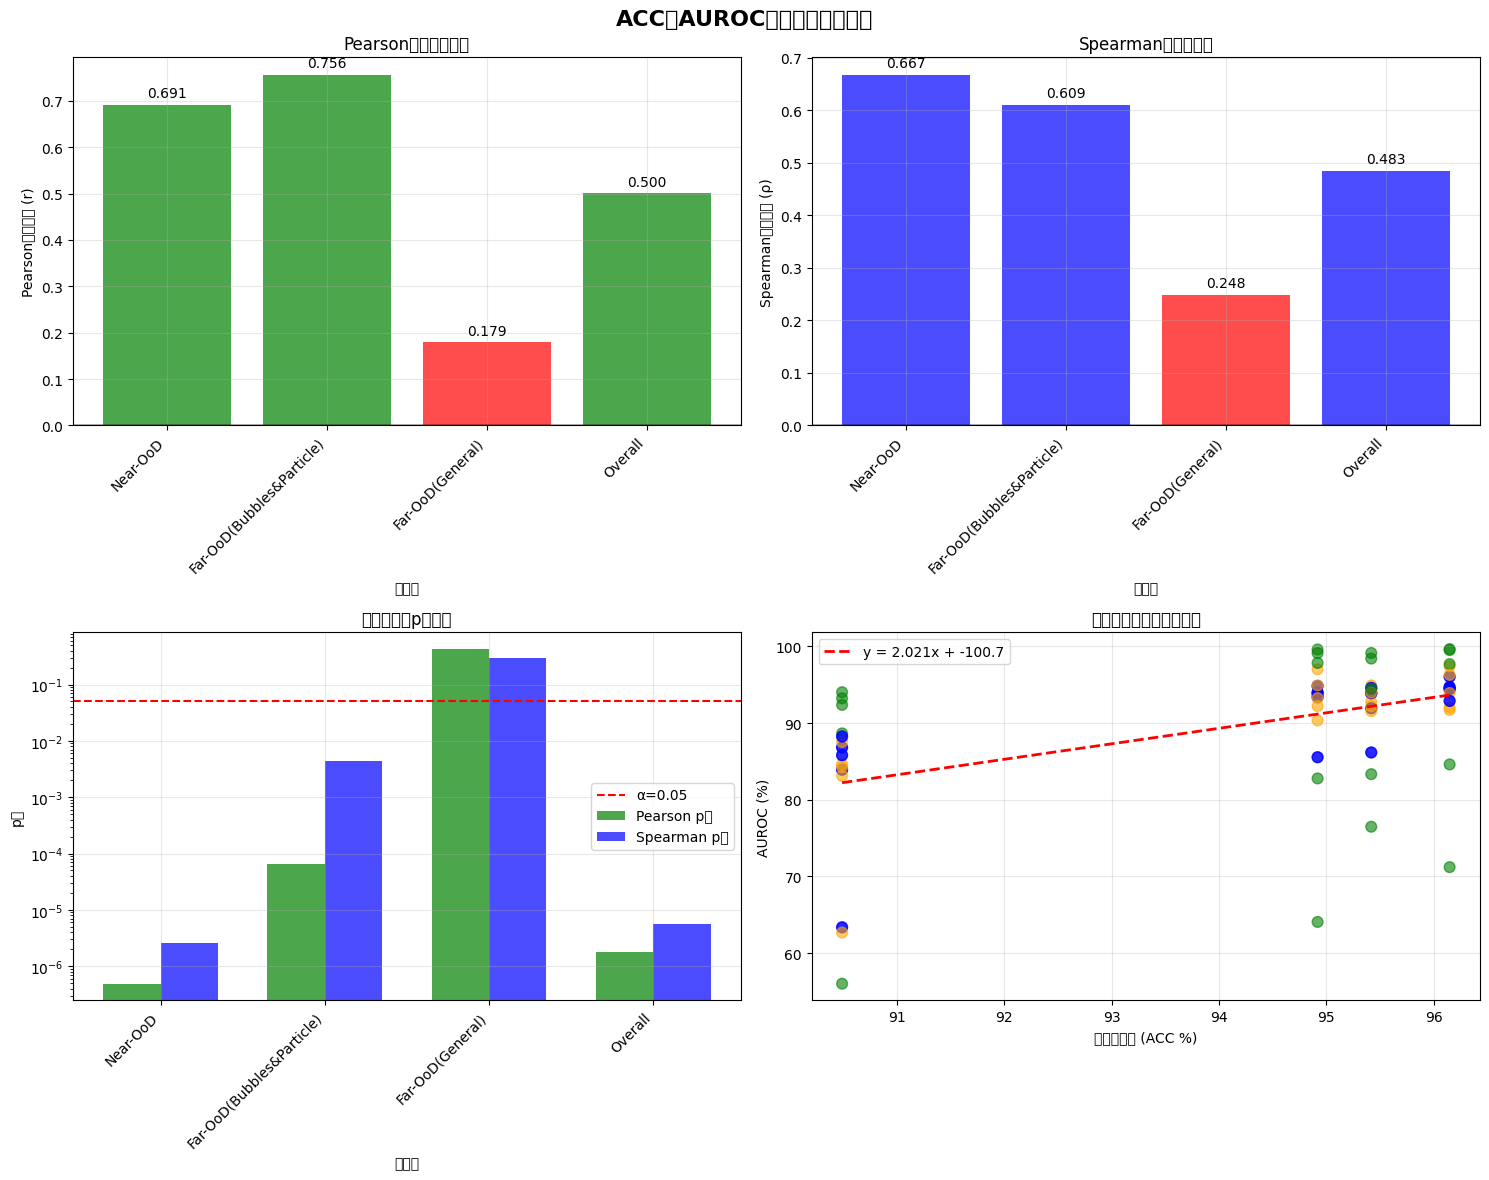


📋 关键发现:
• 线性相关显著的数据集数量: 3
• 秩相关显著的数据集数量: 3
• 整体数据决定系数 (R²): 0.2504 (25.04%的方差可由线性关系解释)


In [12]:
## 3. 综合相关性比较与可视化

print("\n" + "=" * 60)
print("综合相关性比较")
print("=" * 60)

# 创建比较表格
import pandas as pd

comparison_data = []
for dataset in datasets + ['Overall']:
    if dataset in linear_results and dataset in spearman_results:
        comparison_data.append({
            '数据集': dataset,
            'Pearson r': linear_results[dataset]['pearson_r'],
            'Pearson p值': linear_results[dataset]['p_value'],
            'Pearson显著': '是' if linear_results[dataset]['p_value'] < 0.05 else '否',
            'Spearman ρ': spearman_results[dataset]['rho'],
            'Spearman p值': spearman_results[dataset]['p_value'], 
            'Spearman显著': '是' if spearman_results[dataset]['p_value'] < 0.05 else '否',
            'R²': linear_results[dataset]['r2'],
            '样本量': linear_results[dataset]['n_samples']
        })

comparison_df = pd.DataFrame(comparison_data)
print("相关性分析对比表:")
print(comparison_df.round(4).to_string(index=False))

# 绘制相关性可视化图
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ACC与AUROC相关性分析可视化', fontsize=16, fontweight='bold')

# 子图1: 各数据集的Pearson相关系数
ax1 = axes[0, 0]
datasets_for_plot = [d for d in datasets + ['Overall'] if d in linear_results]
pearson_values = [linear_results[d]['pearson_r'] for d in datasets_for_plot]
colors_bar = ['red' if linear_results[d]['p_value'] >= 0.05 else 'green' for d in datasets_for_plot]

bars1 = ax1.bar(range(len(datasets_for_plot)), pearson_values, color=colors_bar, alpha=0.7)
ax1.set_xlabel('数据集')
ax1.set_ylabel('Pearson相关系数 (r)')
ax1.set_title('Pearson线性相关系数')
ax1.set_xticks(range(len(datasets_for_plot)))
ax1.set_xticklabels(datasets_for_plot, rotation=45, ha='right')
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)

# 添加数值标签
for bar, value in zip(bars1, pearson_values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# 子图2: 各数据集的Spearman相关系数
ax2 = axes[0, 1]
spearman_values = [spearman_results[d]['rho'] for d in datasets_for_plot]
colors_bar2 = ['red' if spearman_results[d]['p_value'] >= 0.05 else 'blue' for d in datasets_for_plot]

bars2 = ax2.bar(range(len(datasets_for_plot)), spearman_values, color=colors_bar2, alpha=0.7)
ax2.set_xlabel('数据集')
ax2.set_ylabel('Spearman相关系数 (ρ)')
ax2.set_title('Spearman秩相关系数')
ax2.set_xticks(range(len(datasets_for_plot)))
ax2.set_xticklabels(datasets_for_plot, rotation=45, ha='right')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.grid(True, alpha=0.3)

# 添加数值标签
for bar, value in zip(bars2, spearman_values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# 子图3: p值比较
ax3 = axes[1, 0]
pearson_p_values = [linear_results[d]['p_value'] for d in datasets_for_plot]
spearman_p_values = [spearman_results[d]['p_value'] for d in datasets_for_plot]

x_pos = np.arange(len(datasets_for_plot))
width = 0.35

ax3.bar(x_pos - width/2, pearson_p_values, width, label='Pearson p值', color='green', alpha=0.7)
ax3.bar(x_pos + width/2, spearman_p_values, width, label='Spearman p值', color='blue', alpha=0.7)
ax3.axhline(y=0.05, color='red', linestyle='--', label='α=0.05')
ax3.set_xlabel('数据集')
ax3.set_ylabel('p值')
ax3.set_title('显著性检验p值比较')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(datasets_for_plot, rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')  # 使用对数尺度更好地显示p值

# 子图4: 散点图 - 整体数据
ax4 = axes[1, 1]
overall_data = scatter_df_real
scatter = ax4.scatter(overall_data['ACC'], overall_data['AUROC'], 
                     c=overall_data['Dataset'].map({'Near-OoD': 'blue', 
                                                   'Far-OoD(Bubbles&Particle)': 'orange',
                                                   'Far-OoD(General)': 'green'}),
                     alpha=0.6, s=60)

# 添加回归线
if 'Overall' in linear_results:
    x_range = np.linspace(overall_data['ACC'].min(), overall_data['ACC'].max(), 100)
    y_pred = linear_results['Overall']['slope'] * x_range + linear_results['Overall']['intercept']
    ax4.plot(x_range, y_pred, 'r--', linewidth=2, 
            label=f"y = {linear_results['Overall']['slope']:.3f}x + {linear_results['Overall']['intercept']:.1f}")

ax4.set_xlabel('分类准确率 (ACC %)')
ax4.set_ylabel('AUROC (%)')
ax4.set_title('整体数据散点图与回归线')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📋 关键发现:")
print(f"• 线性相关显著的数据集数量: {len([d for d in linear_results if linear_results[d]['p_value'] < 0.05])}")
print(f"• 秩相关显著的数据集数量: {len([d for d in spearman_results if spearman_results[d]['p_value'] < 0.05])}")
if 'Overall' in linear_results:
    overall_r2 = linear_results['Overall']['r2']
    print(f"• 整体数据决定系数 (R²): {overall_r2:.4f} ({overall_r2*100:.2f}%的方差可由线性关系解释)")